![Image Alt Text](Salary-Prediction-Model-.png)


### Problem Stement :

The goal might be to build a machine learning model to predict whether an individual's salary is above or below a certain threshold based on the given features.

### Context :

The dataset seems to be related to predicting salary levels based on demographic and employment features. It's a common type of dataset used for tasks such as classification. The target variable, in this case, is the 'salary' column, which could be binary (e.g., '>50K' or '<=50K').

### Data Dictionary :

1.age: Age of the individuals.

2.workclass: The type of employment or workclass (private, government, self-employed, etc.).

3.fnlwgt: Final weight. It's a measure used in census data to control the representativeness of the sample.

4.education: The highest level of education completed.

5.education_no_of_years: Number of years spent on education.

6.marital_status: Marital status of the individuals.

7.occupation: The type of occupation or job role.

8.race: Race or ethnic background of the individuals.

9.sex: Gender of the individuals.

10.capital_gain: Capital gains earned by the individuals.

11.capital_loss: Capital losses experienced by the individuals.

12.working_hours_per_week: The number of hours worked per week.

13.native_continent: The continent of origin or native continent.

14.salary: Indicates whether an individual earns less than or equal to 50K or more than 50K annually.

In [1]:
#  imports essential libraries for data manipulation (NumPy, Pandas), visualization (Matplotlib, Seaborn), and configures Matplotlib for inline plotting.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [6]:
 # Load your Salary_data  dataset
data=pd.read_csv("Salary_data (1).csv")

In [5]:
# Let us make another copy of data
df=data.copy()

In [6]:
 # Display first five rows of dataframe
df.head()

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,race,sex,capital_gain,capital_loss,working_hours_per_week,native_contienent,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,White,Male,2174,0,40,north_america,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,married,Exec-managerial,White,Male,0,0,13,north_america,<=50K
2,38,Private,215646,HS-grad,9,not_married,Handlers-cleaners,White,Male,0,0,40,north_america,<=50K
3,53,Private,234721,11th,7,married,Handlers-cleaners,Black,Male,0,0,40,north_america,<=50K
4,28,Private,338409,Bachelors,13,married,Prof-specialty,Black,Female,0,0,40,north_america,<=50K


In [7]:
 # Display Last five rows of dataframe
df.tail()

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,race,sex,capital_gain,capital_loss,working_hours_per_week,native_contienent,salary
32526,27,Private,257302,Assoc-acdm,12,married,Tech-support,White,Female,0,0,38,north_america,<=50K
32527,40,Private,154374,HS-grad,9,married,Machine-op-inspct,White,Male,0,0,40,north_america,>50K
32528,58,Private,151910,HS-grad,9,not_married,Adm-clerical,White,Female,0,0,40,north_america,<=50K
32529,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,White,Male,0,0,20,north_america,<=50K
32530,52,Self-emp-inc,287927,HS-grad,9,married,Exec-managerial,White,Female,15024,0,40,north_america,>50K


In [8]:
# Display size of dataframe
df.size

455434

In [9]:
# Checking the column names
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_no_of_years',
       'marital_status', 'occupation', 'race', 'sex', 'capital_gain',
       'capital_loss', 'working_hours_per_week', 'native_contienent',
       'salary'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32531 entries, 0 to 32530
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     32531 non-null  int64 
 1   workclass               32531 non-null  object
 2   fnlwgt                  32531 non-null  int64 
 3   education               32531 non-null  object
 4   education_no_of_years   32531 non-null  int64 
 5   marital_status          32531 non-null  object
 6   occupation              32531 non-null  object
 7   race                    32531 non-null  object
 8   sex                     32531 non-null  object
 9   capital_gain            32531 non-null  int64 
 10  capital_loss            32531 non-null  int64 
 11  working_hours_per_week  32531 non-null  int64 
 12  native_contienent       32531 non-null  object
 13  salary                  32531 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


Observations :

There are 32531 rows and 14 columns. There are 8 independent object variable, 6 numerical independent variable and dependent variable is of int64 type.

In [11]:
# Column name has some spaces fix them
df.columns = [col.replace(' ','_') for col in df.columns]

In [12]:
df.isna().sum()

age                       0
workclass                 0
fnlwgt                    0
education                 0
education_no_of_years     0
marital_status            0
occupation                0
race                      0
sex                       0
capital_gain              0
capital_loss              0
working_hours_per_week    0
native_contienent         0
salary                    0
dtype: int64

There are no missing values in the provided data.

statistical summary :

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32531.0,38.588362,13.637644,17.0,28.0,37.0,48.0,90.0
fnlwgt,32531.0,189788.230826,105564.168325,12285.0,117815.0,178370.0,237019.0,1484705.0
education_no_of_years,32531.0,10.081953,2.571842,1.0,9.0,10.0,12.0,16.0
capital_gain,32531.0,1078.642649,7388.624210,0.0,0.0,0.0,0.0,99999.0
capital_loss,32531.0,87.384341,403.137260,0.0,0.0,0.0,0.0,4356.0
working_hours_per_week,32531.0,40.441025,12.347506,1.0,40.0,40.0,45.0,99.0


- Age ranges from 17 to 90, with an average of 38.6 years.

- Fnlwgt (final weight) varies from 12,285 to 1,484,705, with an average of 189,788.

- Education years range from 1 to 16, with an average of 10.1 years.

- Capital gain has an average of 1078.6, ranging from 0 to 99,999.

- Capital loss ranges from 0 to 4,356, with an average of 87.4.

- Working hours per week vary from 1 to 99, with an average of 40.4 hours.

In [14]:
df.describe(include='object').T

,count,unique,top,freq
workclass,32531,9,Private,22667
education,32531,16,HS-grad,10490
marital_status,32531,3,married,14993
occupation,32531,15,Prof-specialty,4136
race,32531,5,White,27789
sex,32531,2,Male,21773
native_contienent,32531,5,north_america,30559
salary,32531,2,<=50K,24692


Observations for categorical columns:

- Workclass has 9 unique values, with "Private" being the most common (22,667 occurrences).

- Education has 16 unique values, with "HS-grad" being the most frequent (10,490 occurrences).

- Marital status has 3 unique values, with "married" being the most common (14,993 occurrences).

- Occupation has 15 unique values, with "Prof-specialty" being the most frequent (4,136 occurrences).

- Race has 5 unique values, with "White" being the most common (27,789 occurrences).

- Sex has 2 unique values, with "Male" occurring 21,773 times.

- Native continent has 5 unique values, with "north_america" being the most common (30,559 occurrences).

- Salary has 2 unique values, with "<=50K" occurring 24,692 times.

Distribution of each numerical column

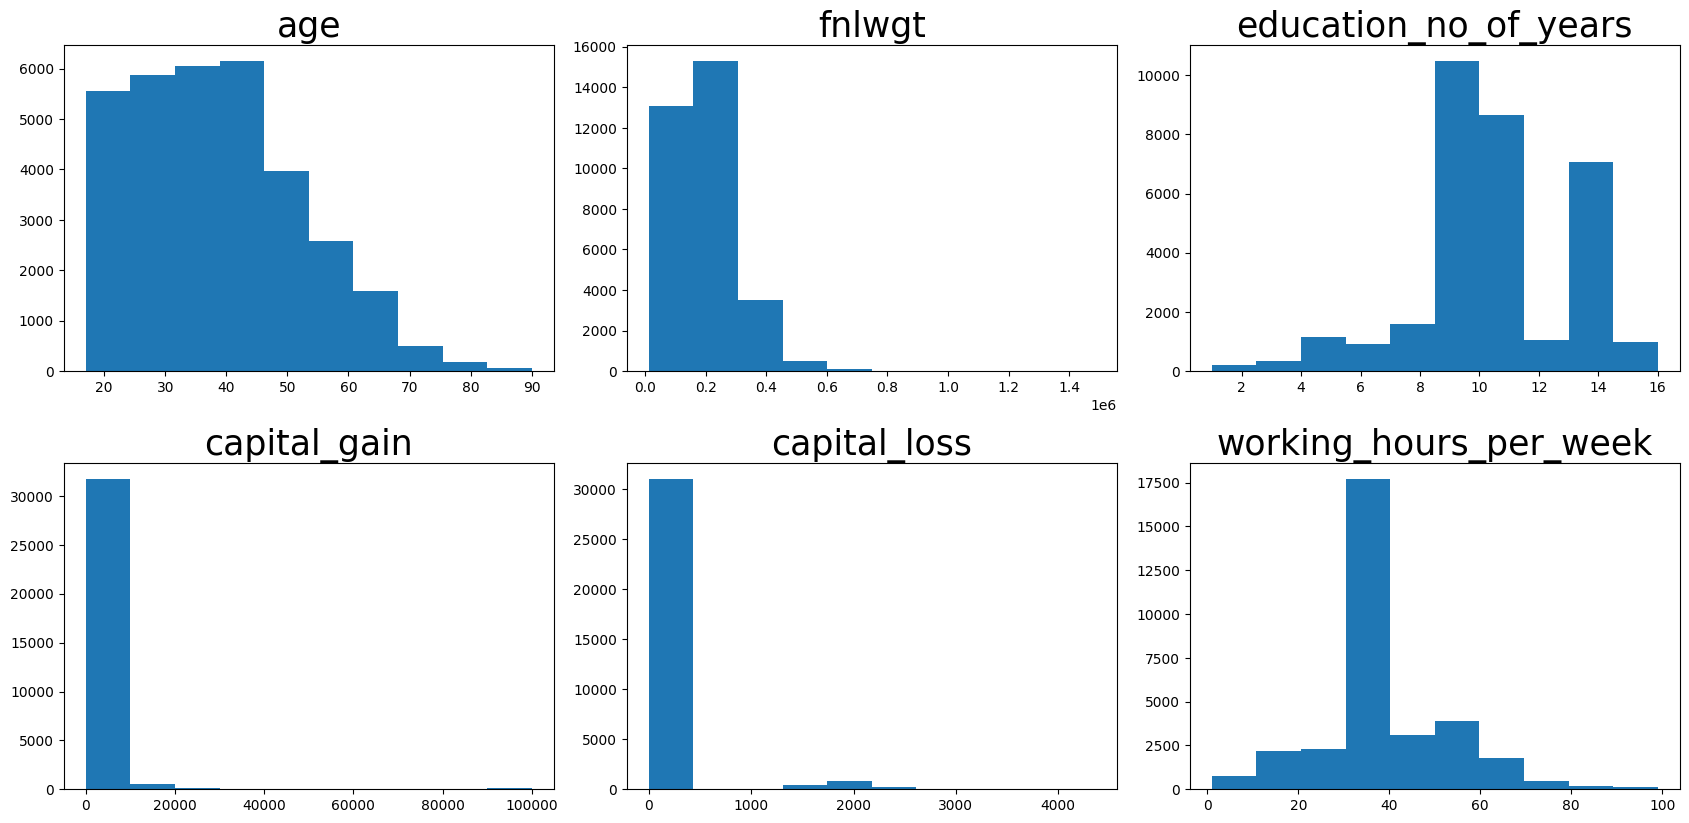

In [ ]:
# lets plot histogram of all plots
from scipy.stats import norm
all_col = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(17,75))

for i in range(len(all_col)):
    plt.subplot(18,3,i+1)
    plt.hist(df[all_col[i]])
    #sns.displot(df[all_col[i]], kde=True)
    plt.tight_layout()
    plt.title(all_col[i],fontsize=25)


plt.show()

Text(0, 0.5, 'Values')

<Figure size 800x600 with 0 Axes>

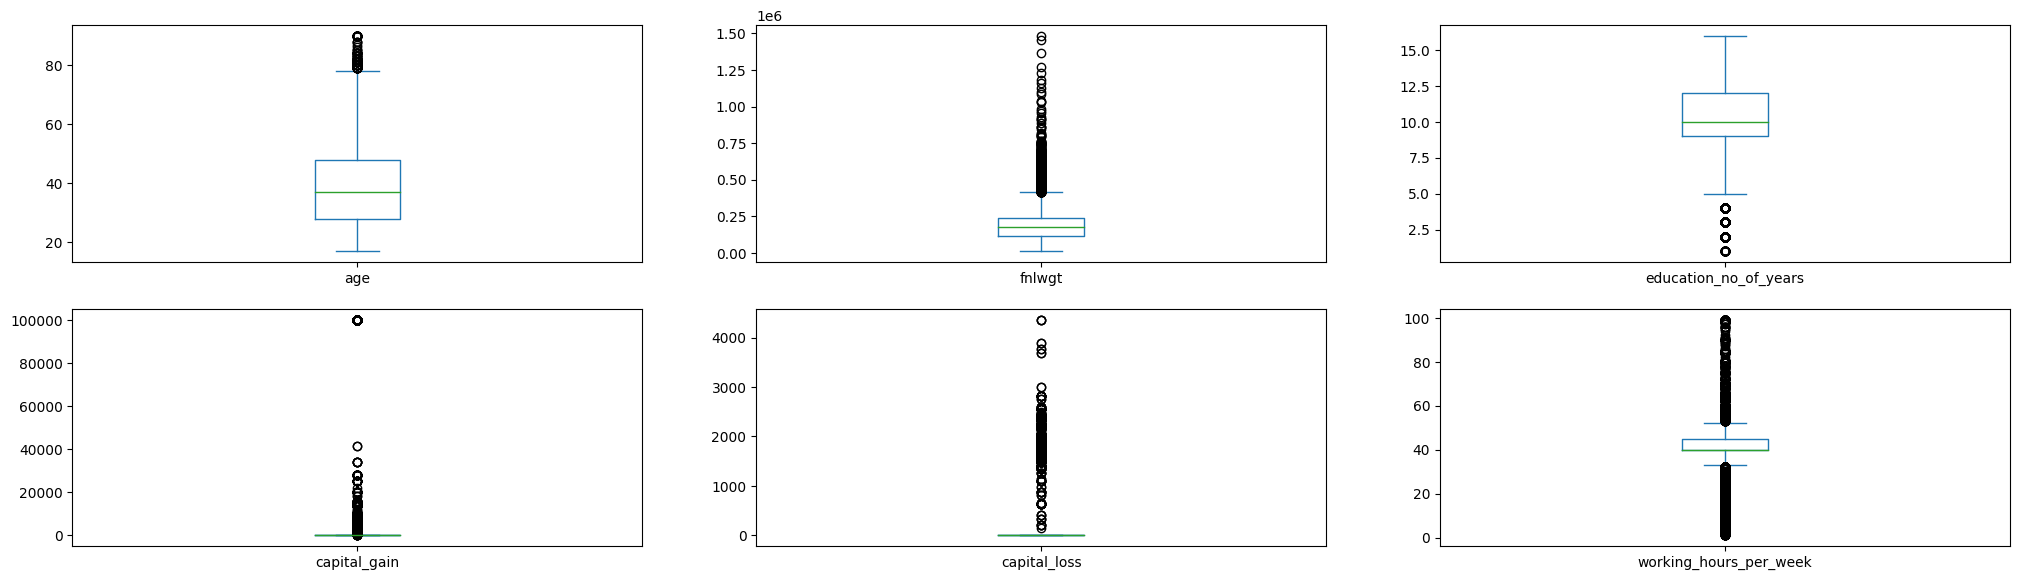

In [ ]:
# Melt the DataFrame to create boxplots for each column
melted_df = df.melt()

# Create multiple boxplots using Seaborn
plt.figure(figsize=(8, 6))
# Using Pandas to create multiple boxplots
boxplot = df.plot(kind='box',subplots=True, layout=(11,3), sharex=False, sharey=False, figsize=(25,40))
plt.xlabel('Columns')
plt.ylabel('Values')

Outliers  represent valid and genuine data points that reflect the natural variability in the dataset. Removing them might lead to a loss of valuable information.

distplots

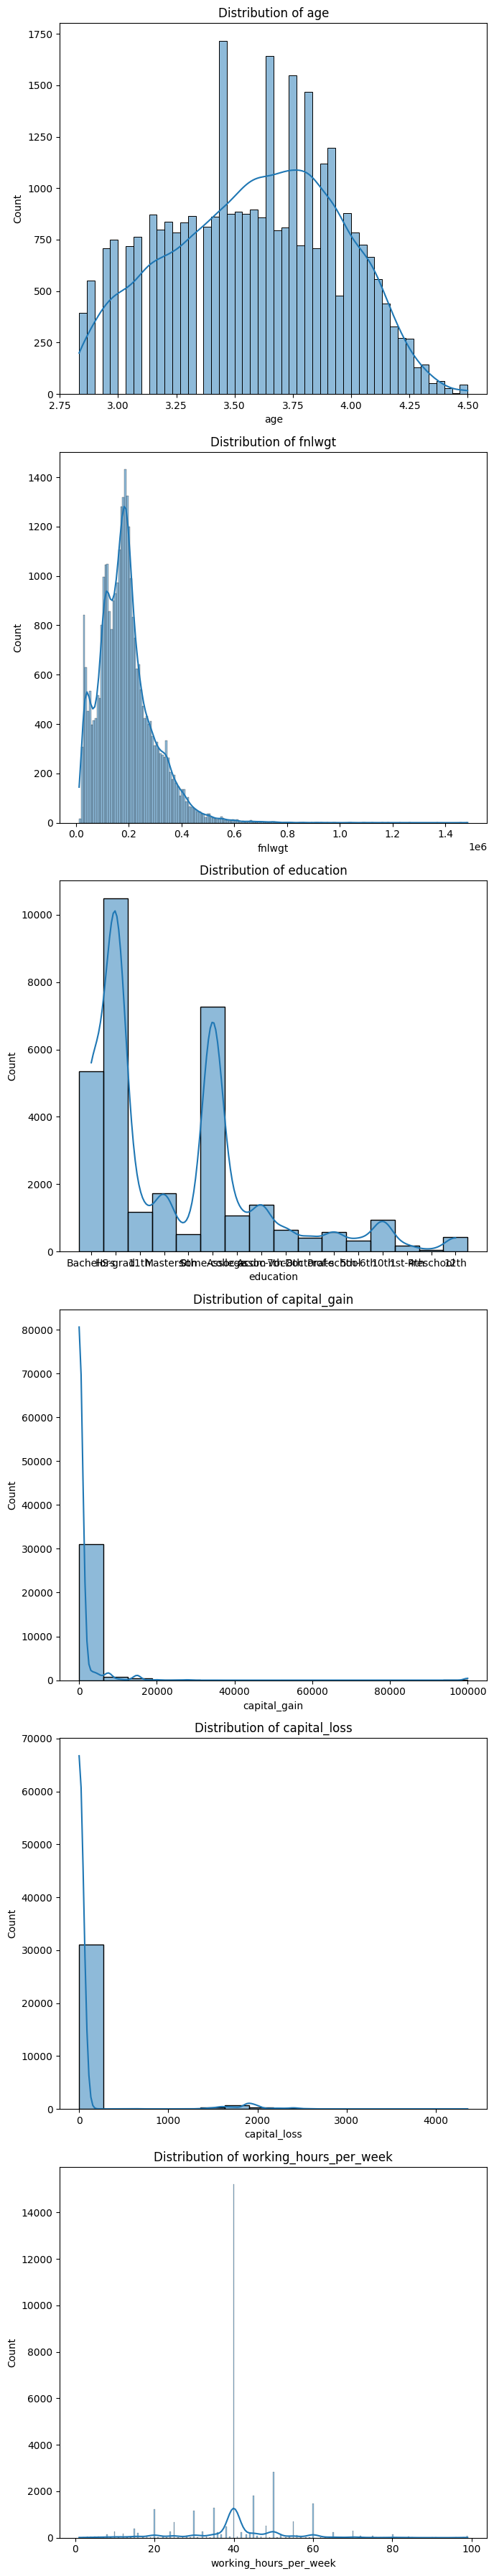

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' contains the DataFrame with multiple columns
columns_to_plot = ['age', 'fnlwgt', 'education', 'capital_gain','capital_loss','working_hours_per_week']  # Replace with your column names

# Set up subplots
fig, axes = plt.subplots(nrows=len(columns_to_plot), figsize=(7, 6 * len(columns_to_plot)))

# Iterate through columns and create distplot for each
for i, column in enumerate(columns_to_plot):
    sns.histplot(df[column], ax=axes[i], kde=True)  # Use sns.histplot for newer versions of Seaborn
    axes[i].set_title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

 These visualizations offer a quick overview of the distributions of selected columns in the dataset, helping to identify patterns and potential outliers.

Handling categorical columns:

In [15]:
df.age.unique()

array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87])

In [16]:
df.age.nunique()

73

In [17]:
# Check if age is skewed
df["age"].skew()

0.5574588608673416

In [18]:
# Remove the skewness making a new column  called age_log to store the log of age
df["age"]=np.log(df["age"])

<Axes: xlabel='age', ylabel='Density'>

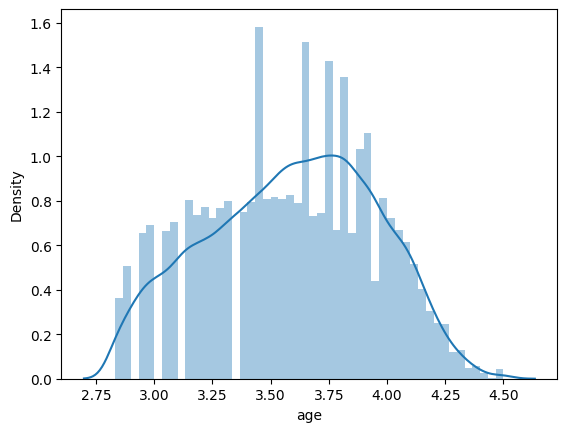

In [19]:
#  Plot the histogram of age_log variable to check the distribution of age_log
sns.distplot(df["age"])

In [20]:
df["fnlwgt"].unique()

array([ 77516,  83311, 215646, ...,  34066,  84661, 257302])

In [21]:
df["fnlwgt"].nunique()

21648

<Axes: xlabel='fnlwgt', ylabel='Density'>

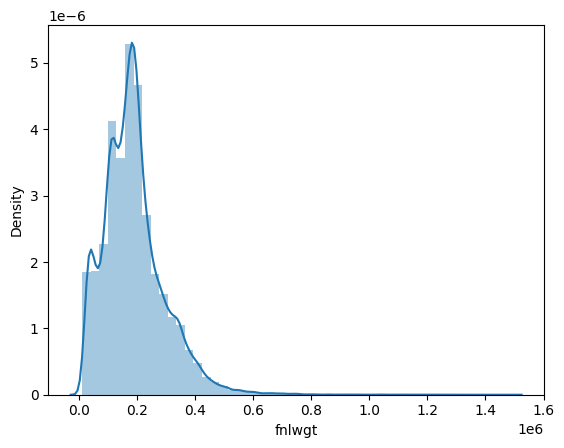

In [22]:
#  Plot the histogram of fnlwgt variable to check the distribution of fnlwgt
sns.distplot(df["fnlwgt"])

In [23]:
# Check the skewness
df["fnlwgt"].skew()

1.4474647403580776

In [24]:
#  Remove the skewness and make a new column called fnlwgt_log to store the log of fnlwgt
df["fnlwgt"]=np.log(df["fnlwgt"])

<Axes: xlabel='fnlwgt', ylabel='Density'>

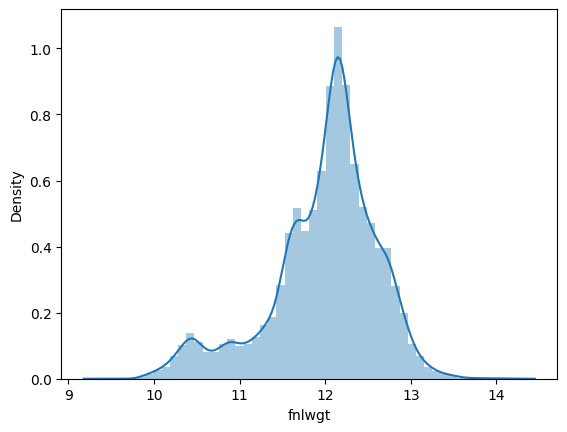

In [25]:
# Plot the histogram of fnlwgt_log variable to check the distribution of fnlwgt_log
sns.distplot(df["fnlwgt"])

In [26]:
df["education_no_of_years"].unique()

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8])

In [27]:
df["education_no_of_years"].nunique()

16

<Axes: xlabel='education_no_of_years', ylabel='Density'>

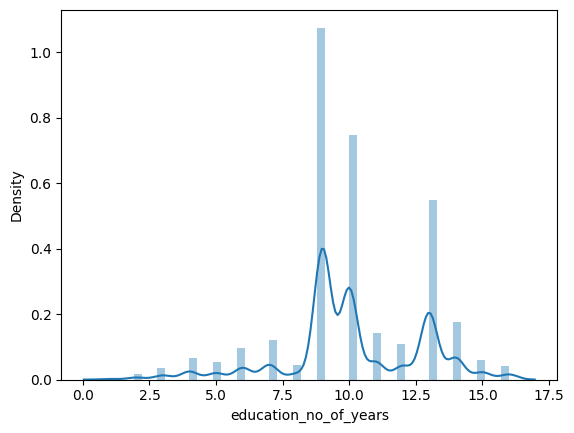

In [28]:
#  Plot the histogram of education_no_of_years variable to check the distribution of education_no_of_years
sns.distplot(df["education_no_of_years"])

In [29]:
#  Check the skewness of education_no_of_years
df["education_no_of_years"].skew()

-0.30963374192103343

In [30]:
#  Remove the skewness and make a new column called education_no_of_years_log to store the log of education_no_of_years
df["education_no_of_years"]=np.log(df["education_no_of_years"])

<Axes: xlabel='education_no_of_years', ylabel='Density'>

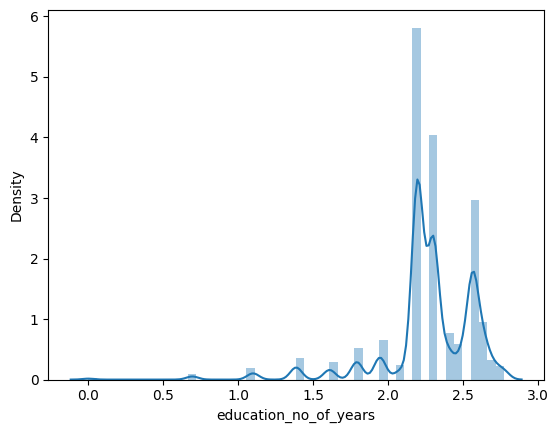

In [31]:
#  Plot the histogram of education_no_of_years_log variable to check the distribution of education_no_of_years_log
sns.distplot(df["education_no_of_years"])

In [32]:
# Check the skewness of education_no_of_years_log
df["education_no_of_years"].skew()

-2.1006697486497896

In [33]:
# Usin square root to remove the skewness and make a new column called fnlwgt_sqr to store the square root of fnlwgt
df["education_no_of_years"]=np.sqrt(df["education_no_of_years"])

<Axes: xlabel='education_no_of_years', ylabel='Density'>

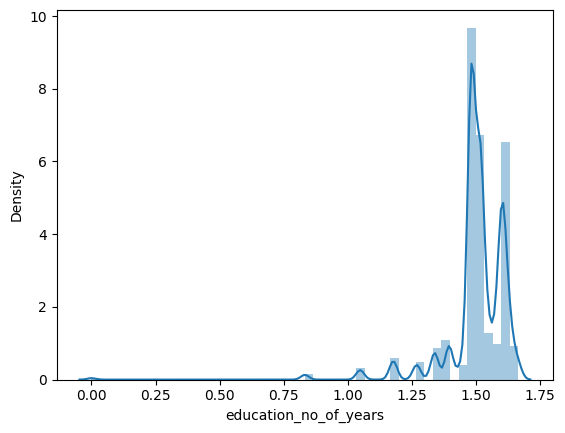

In [34]:
# Plot the histogram of fnlwgt_sqr variable to check the distribution of fnlwgt_sqr
sns.distplot(df["education_no_of_years"])

In [35]:
# Check the skewness of education_no_of_years_log
df["education_no_of_years"].skew()

-4.266007972471441

In [36]:
# Import boxcox
from scipy.stats import boxcox

In [37]:
from scipy.stats import boxcox
import numpy as np

# Shifting the minimum value to ensure positive data
min_value = df["education_no_of_years"].min()
if min_value <= 0:
    df["education_no_of_years"] = df["education_no_of_years"] + abs(min_value) + 1  # Adding 1 to avoid zero values

# Applying Box-Cox transformation
df["education_no_of_years"], parameters = boxcox(df["education_no_of_years"])

<Axes: xlabel='education_no_of_years', ylabel='Density'>

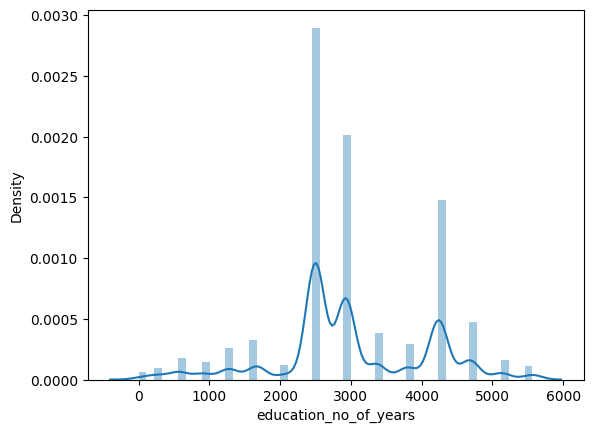

In [38]:
# Plot the histogram of education_no_of_years_boxcox variable to check the distribution of education_no_of_years_boxcox
sns.distplot(df["education_no_of_years"])

In [39]:
# Check the skewness of education_no_of_years_log
df["education_no_of_years"].skew()

-0.06276036096008378

In [40]:
df["capital_gain"].unique()

array([ 2174,     0, 14084,  5178,  5013,  2407, 14344, 15024,  7688,
       34095,  4064,  4386,  7298,  1409,  3674,  1055,  3464,  2050,
        2176,   594, 20051,  6849,  4101,  1111,  8614,  3411,  2597,
       25236,  4650,  9386,  2463,  3103, 10605,  2964,  3325,  2580,
        3471,  4865, 99999,  6514,  1471,  2329,  2105,  2885, 25124,
       10520,  2202,  2961, 27828,  6767,  2228,  1506, 13550,  2635,
        5556,  4787,  3781,  3137,  3818,  3942,   914,   401,  2829,
        2977,  4934,  2062,  2354,  5455, 15020,  1424,  3273, 22040,
        4416,  3908, 10566,   991,  4931,  1086,  7430,  6497,   114,
        7896,  2346,  3418,  3432,  2907,  1151,  2414,  2290, 15831,
       41310,  4508,  2538,  3456,  6418,  1848,  3887,  5721,  9562,
        1455,  2036,  1831, 11678,  2936,  2993,  7443,  6360,  1797,
        1173,  4687,  6723,  2009,  6097,  2653,  1639, 18481,  7978,
        2387,  5060])

In [41]:
df["capital_gain"].nunique()

119

<Axes: xlabel='capital_gain', ylabel='Density'>

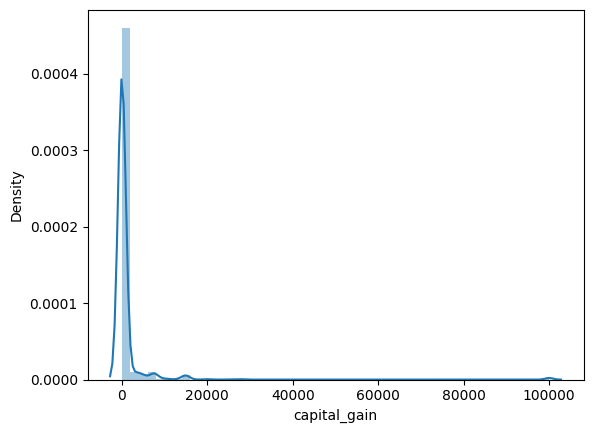

In [42]:
#  Plot the histogram of capital_gain variable to check the distribution of capital_gain
sns.distplot(df["capital_gain"])

In [43]:
# Check the skewness of capital_gain
df["capital_gain"].skew()

11.948291362095288

In [44]:
#  Remove the skewness and make a new column called capital_gain_log to store the log of capital_gain
df["capital_gain"]=np.log1p(df["capital_gain"])

<Axes: xlabel='capital_gain', ylabel='Density'>

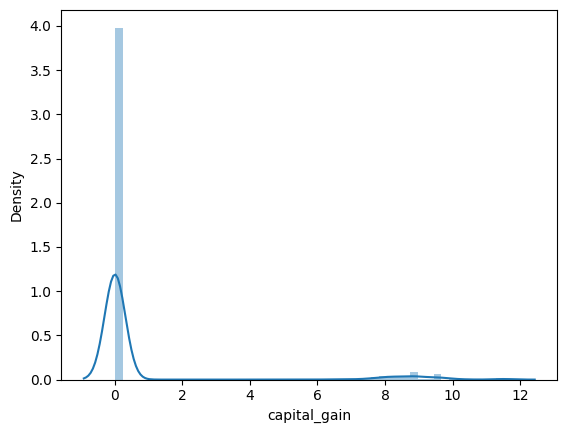

In [45]:
#  Plot the histogram of capital_gain_log variable to check the distribution of capital_gain_log
sns.distplot(df["capital_gain"])

In [46]:
#  Check the skewness of capital_gain_log
df["capital_gain"].skew()

3.0942975030031246

In [47]:
df["capital_loss"].unique()

array([   0, 2042, 1408, 1902, 1573, 1887, 1719, 1762, 1564, 2179, 1816,
       1980, 1977, 1876, 1340, 2206, 1741, 1485, 2339, 2415, 1380, 1721,
       2051, 2377, 1669, 2352, 1672,  653, 2392, 1504, 2001, 1590, 1651,
       1628, 1848, 1740, 2002, 1579, 2258, 1602,  419, 2547, 2174, 2205,
       1726, 2444, 1138, 2238,  625,  213, 1539,  880, 1668, 1092, 1594,
       3004, 2231, 1844,  810, 2824, 2559, 2057, 1974,  974, 2149, 1825,
       1735, 1258, 2129, 2603, 2282,  323, 4356, 2246, 1617, 1648, 2489,
       3770, 1755, 3683, 2267, 2080, 2457,  155, 3900, 2201, 1944, 2467,
       2163, 2754, 2472, 1411])

In [48]:
df["capital_loss"].nunique()

92

<Axes: xlabel='capital_loss', ylabel='Density'>

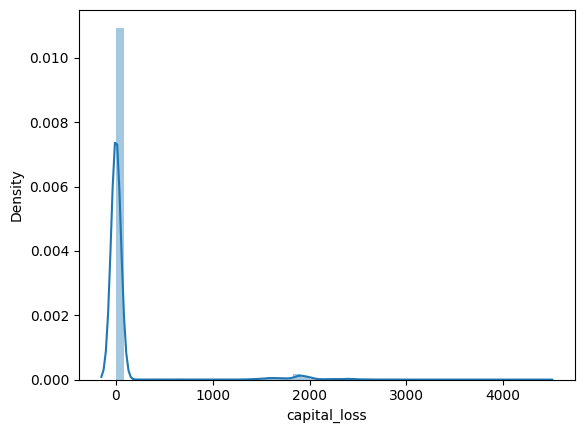

In [49]:
#  Plot the histogram of capital_loss variable to check the distribution of capital_loss
sns.distplot(df["capital_loss"])

In [50]:
3# Check the skewness of capital_loss
df["capital_loss"].skew()

4.592220623236824

<Axes: xlabel='capital_loss', ylabel='Density'>

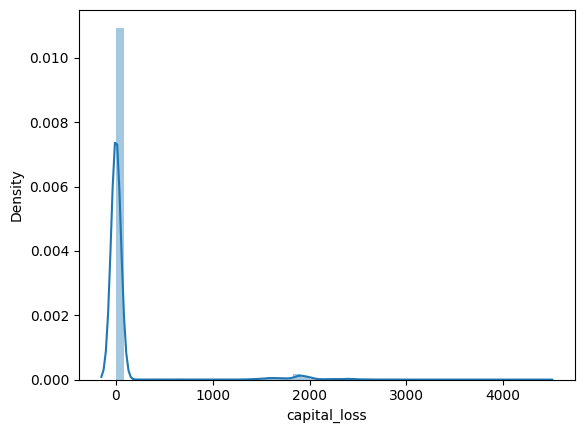

In [51]:
#  Plot the histogram of capital_loss_log variable to check the distribution of capital_loss_log
sns.distplot(df["capital_loss"])

In [52]:
#  Check the skewness of capital_loss_log
df["capital_loss"].skew()

4.592220623236824

In [53]:
df["working_hours_per_week"].unique()

array([40, 13, 16, 45, 50, 80, 30, 35, 60, 20, 52, 44, 15, 25, 38, 43, 55,
       48, 58, 32, 70,  2, 22, 56, 41, 28, 36, 24, 46, 42, 12, 65,  1, 10,
       34, 75, 98, 33, 54,  8,  6, 64, 19, 18, 72,  5,  9, 47, 37, 21, 26,
       14,  4, 59,  7, 99, 53, 39, 62, 57, 78, 90, 66, 11, 49, 84,  3, 17,
       68, 27, 85, 31, 51, 77, 63, 23, 87, 88, 73, 89, 97, 94, 29, 96, 67,
       82, 86, 91, 81, 76, 92, 61, 74, 95])

In [54]:
df["working_hours_per_week"].nunique()

94

<Axes: xlabel='working_hours_per_week', ylabel='Density'>

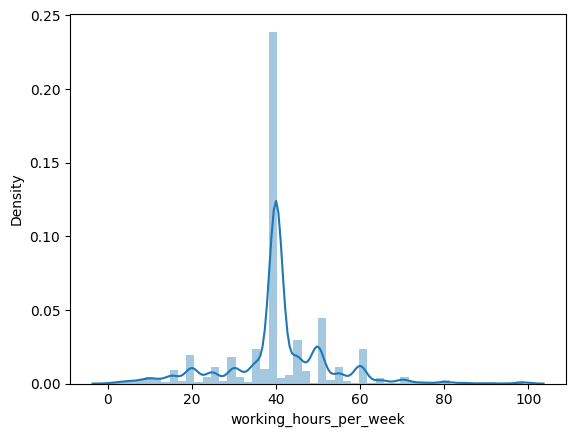

In [55]:
#  Plot the histogram of working_hours_per_week variable to check the distribution of working_hours_per_week
sns.distplot(df["working_hours_per_week"])

In [56]:
# Check the skewness of working_hours_per_week
df["working_hours_per_week"].skew()

0.22873711636642202

In [57]:
#  Remove the skewness and make a new column called working_hours_per_week_log to store the log of working_hours_per_week
df["working_hours_per_week"]=np.log(df["working_hours_per_week"])

<Axes: xlabel='working_hours_per_week', ylabel='Density'>

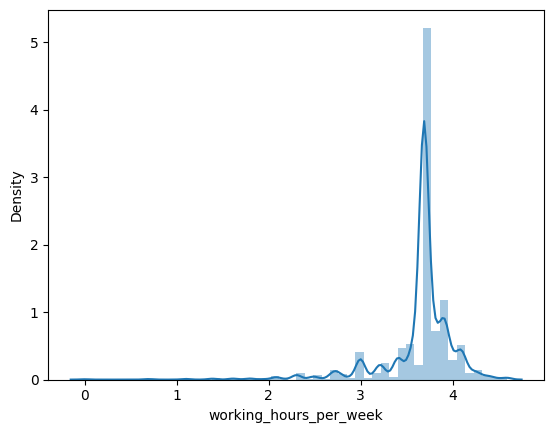

In [58]:
#  Plot the histogram of working_hours_per_week_log variable to check the distribution of working_hours_per_week_log
sns.distplot(df["working_hours_per_week"])

In [59]:
#  Check the skewness of working_hours_per_week_log
df["working_hours_per_week"].skew()

-2.6537995858931884

In [60]:
from scipy.stats import boxcox
import numpy as np

# Shifting the minimum value to ensure positive data
min_value = df["working_hours_per_week"].min()
if min_value <= 0:
    df["working_hours_per_week"] = df["working_hours_per_week"] + abs(min_value) + 1  # Adding 1 to avoid zero values

# Applying Box-Cox transformation
df["working_hours_per_week"], parameters = boxcox(df["working_hours_per_week"])

<Axes: xlabel='education_no_of_years', ylabel='Density'>

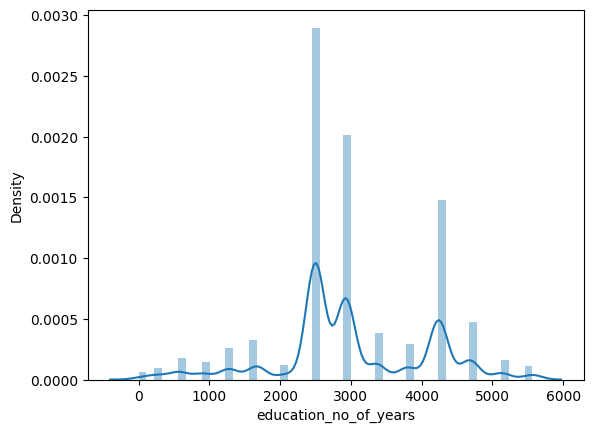

In [61]:
# Plot the histogram of education_no_of_years_boxcox variable to check the distribution of education_no_of_years_boxcox
sns.distplot(df["education_no_of_years"])

In [62]:
#  Check the skewness of working_hours_per_week_log
df["education_no_of_years"].skew()

-0.06276036096008378

Handling numrical columns:

In [63]:
df.workclass.unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', 'Unknown', 'Self-emp-inc', 'Without-pay',
       'Never-worked'], dtype=object)

In [64]:
mode_value = df['workclass'].mode().iloc[0]
df['workclass'] = df['workclass'].replace('Unknown', mode_value)

In [65]:
# Assuming 'workclass' is the column name
# Grouping similar categories together
df['workclass'] = df['workclass'].replace(['State-gov', 'Federal-gov', 'Local-gov'], 'Government')
df['workclass'] = df['workclass'].replace(['Self-emp-not-inc', 'Self-emp-inc'], 'Self-Employed')
df['workclass'] = df['workclass'].replace(['Without-pay', 'Never-worked'], 'Unemployed')
# 'Private' and 'Unknown' are already distinct, so we'll keep them as they are

# Checking the unique values after grouping
print(df['workclass'].unique())

['Government' 'Self-Employed' 'Private' 'Unemployed']


Text(0, 0.5, 'count')

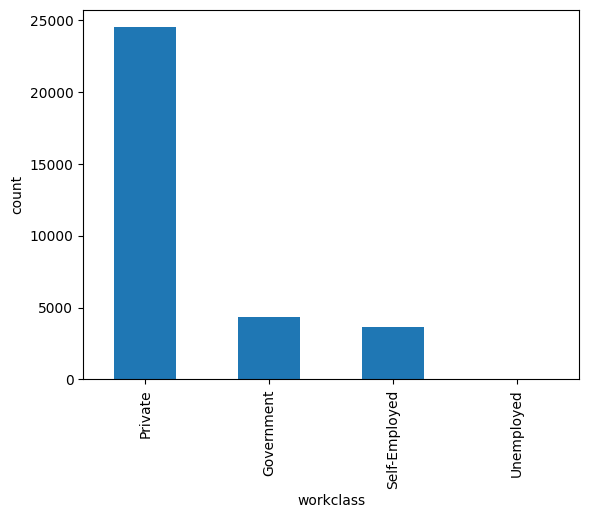

In [66]:
df['workclass'].value_counts().plot(kind='bar')
plt.xlabel('workclass')
plt.ylabel('count')

In [67]:
df.education.unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

In [68]:
# Grouping similar education levels together
df['education'] = df['education'].replace(['11th', '9th', '7th-8th', '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], 'School')
df['education'] = df['education'].replace(['Bachelors', 'Some-college', 'HS-grad'], 'High-School or Equivalent')
df['education'] = df['education'].replace(['Masters', 'Assoc-acdm', 'Assoc-voc'], 'Associate or Master')
df['education'] = df['education'].replace(['Doctorate', 'Prof-school'], 'Advanced Degree')

# Checking the unique values after grouping
print(df['education'].unique())

['High-School or Equivalent' 'School' 'Associate or Master'
 'Advanced Degree']


Text(0, 0.5, 'count')

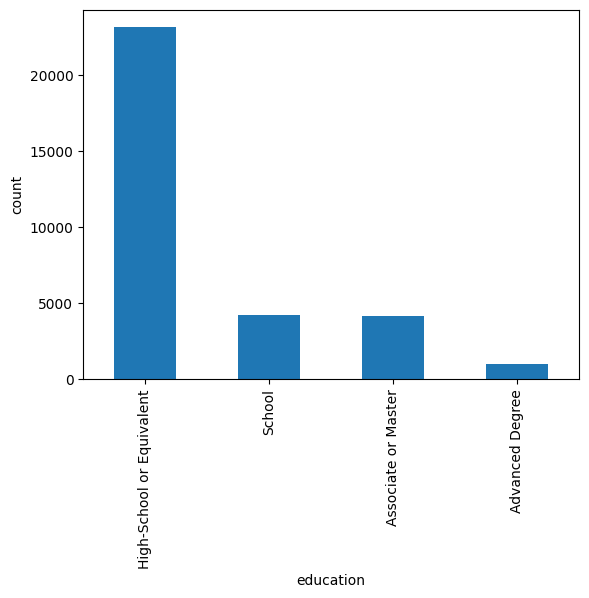

In [69]:
df['education'].value_counts().plot(kind='bar')
plt.xlabel('education')
plt.ylabel('count')

In [70]:
df.marital_status.unique()

array(['Never-married', 'married', 'not_married'], dtype=object)

In [71]:
# Assuming 'marital_status' is the column name and 'Never-married' needs to be replaced
df['marital_status'] = df['marital_status'].replace('Never-married', 'not_married')

Text(0, 0.5, 'count')

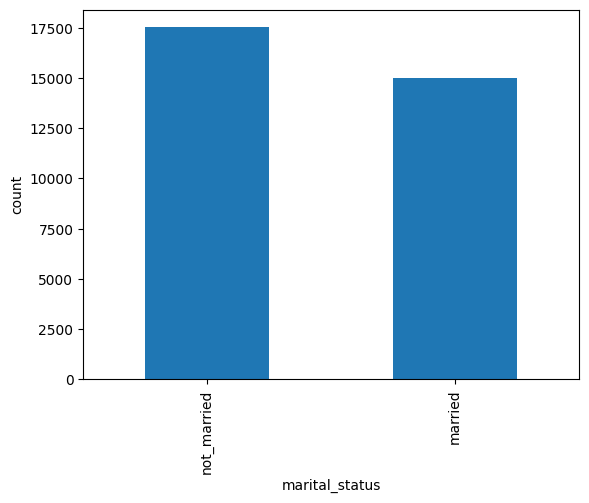

In [72]:
df['marital_status'].value_counts().plot(kind='bar')
plt.xlabel('marital_status')
plt.ylabel('count')

In [73]:
df.race.unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
       'Other'], dtype=object)

Text(0, 0.5, 'count')

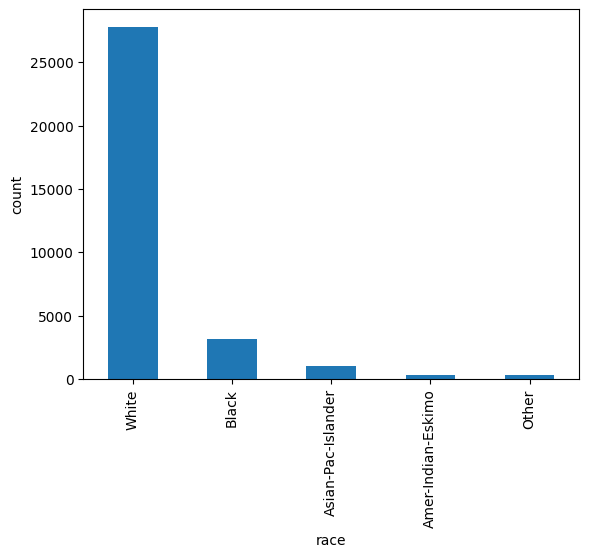

In [74]:
df['race'].value_counts().plot(kind='bar')
plt.xlabel('race')
plt.ylabel('count')

In [75]:
df.sex.unique()

array(['Male', 'Female'], dtype=object)

Text(0, 0.5, 'count')

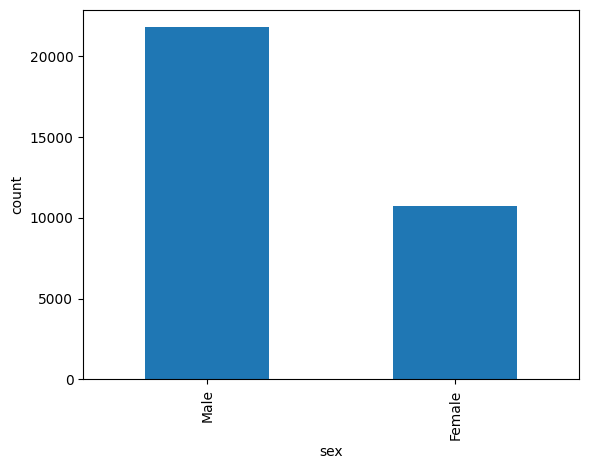

In [76]:
df['sex'].value_counts().plot(kind='bar')
plt.xlabel('sex')
plt.ylabel('count')

In [77]:
df.occupation.unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', 'Unknown', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [78]:
mode_value = df['occupation'].mode().iloc[0]
df['occupation'] = df['occupation'].replace('Unknown', mode_value)

In [79]:
# Grouping similar occupations together
df['occupation'] = df['occupation'].replace(['Adm-clerical', 'Other-service'], 'Office or Administrative')
df['occupation'] = df['occupation'].replace(['Exec-managerial', 'Prof-specialty'], 'Professional')
df['occupation'] = df['occupation'].replace(['Handlers-cleaners', 'Craft-repair', 'Transport-moving', 'Farming-fishing', 'Machine-op-inspct'], 'Manual Labor')
df['occupation'] = df['occupation'].replace(['Tech-support'], 'Technical Support')
df['occupation'] = df['occupation'].replace(['Sales'], 'Sales')
df['occupation'] = df['occupation'].replace(['Unknown'], 'Unknown')
df['occupation'] = df['occupation'].replace(['Protective-serv', 'Armed-Forces'], 'Protective Services')
df['occupation'] = df['occupation'].replace(['Priv-house-serv'], 'Private House Services')

# Checking the unique values after grouping
print(df['occupation'].unique())

['Office or Administrative' 'Professional' 'Manual Labor' 'Sales'
 'Technical Support' 'Protective Services' 'Private House Services']


Text(0, 0.5, 'count')

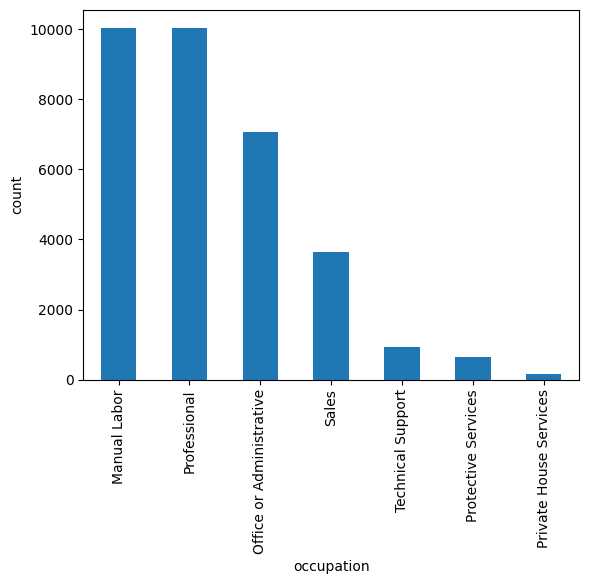

In [80]:
df['occupation'].value_counts().plot(kind='bar')
plt.xlabel('occupation')
plt.ylabel('count')

In [81]:
df.native_contienent.unique()

array(['north_america', 'asia', 'other', 'europe', 'south_america'],
      dtype=object)

Text(0, 0.5, 'count')

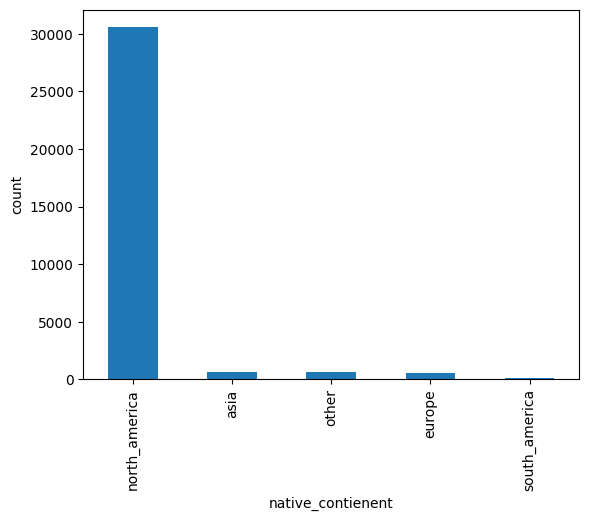

In [82]:
df['native_contienent'].value_counts().plot(kind='bar')
plt.xlabel('native_contienent')
plt.ylabel('count')

In [83]:
df.salary.unique()

array([' <=50K', ' >50K'], dtype=object)

Text(0, 0.5, 'salary')

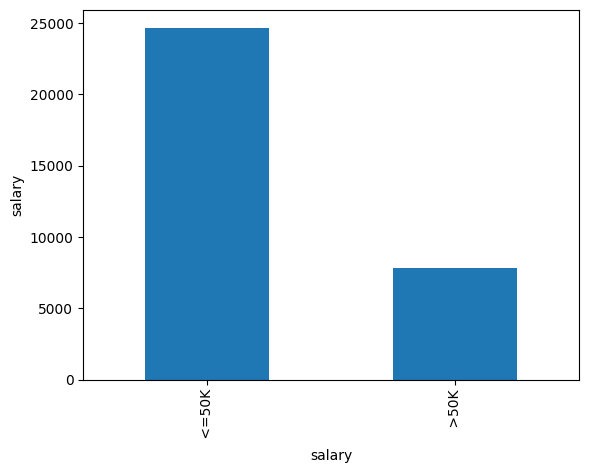

In [84]:
df['salary'].value_counts().plot(kind='bar')
plt.xlabel('salary')
plt.ylabel('salary')

In [85]:
df.occupation.unique()

array(['Office or Administrative', 'Professional', 'Manual Labor',
       'Sales', 'Technical Support', 'Protective Services',
       'Private House Services'], dtype=object)

In [86]:
mode_value = df['occupation'].mode().iloc[0]
df['occupation'] = df['occupation'].replace('Unknown', mode_value)

In [87]:
# Grouping similar occupations together
df['occupation'] = df['occupation'].replace(['Adm-clerical', 'Other-service'], 'Office or Administrative')
df['occupation'] = df['occupation'].replace(['Exec-managerial', 'Prof-specialty'], 'Professional')
df['occupation'] = df['occupation'].replace(['Handlers-cleaners', 'Craft-repair', 'Transport-moving', 'Farming-fishing', 'Machine-op-inspct'], 'Manual Labor')
df['occupation'] = df['occupation'].replace(['Tech-support'], 'Technical Support')
df['occupation'] = df['occupation'].replace(['Sales'], 'Sales')
df['occupation'] = df['occupation'].replace(['Unknown'], 'Unknown')
df['occupation'] = df['occupation'].replace(['Protective-serv', 'Armed-Forces'], 'Protective Services')
df['occupation'] = df['occupation'].replace(['Priv-house-serv'], 'Private House Services')

# Checking the unique values after grouping
print(df['occupation'].unique())

['Office or Administrative' 'Professional' 'Manual Labor' 'Sales'
 'Technical Support' 'Protective Services' 'Private House Services']


Text(0, 0.5, 'count')

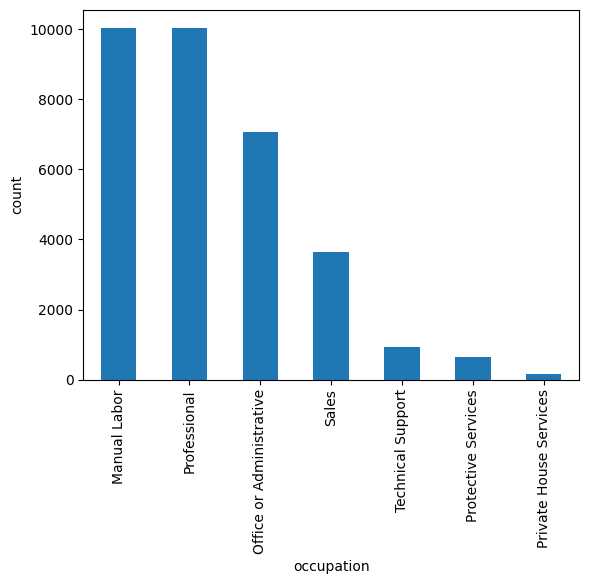

In [88]:
df['occupation'].value_counts().plot(kind='bar')
plt.xlabel('occupation')
plt.ylabel('count')

In [89]:
df.native_contienent.unique()

array(['north_america', 'asia', 'other', 'europe', 'south_america'],
      dtype=object)

Text(0, 0.5, 'count')

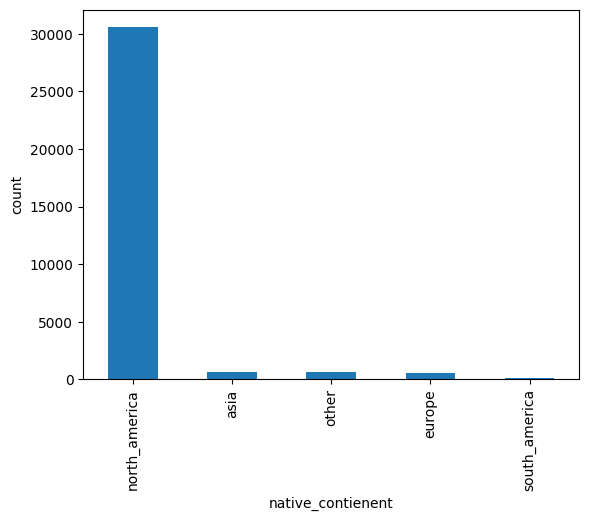

In [90]:
df['native_contienent'].value_counts().plot(kind='bar')
plt.xlabel('native_contienent')
plt.ylabel('count')

In [91]:
df.salary.unique()

array([' <=50K', ' >50K'], dtype=object)

Text(0, 0.5, 'salary')

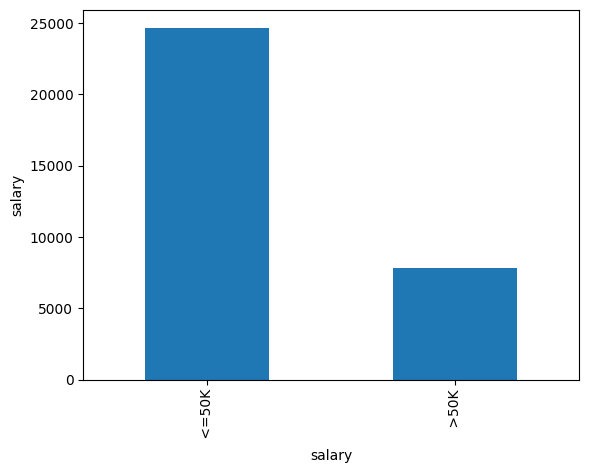

In [92]:
df['salary'].value_counts().plot(kind='bar')
plt.xlabel('salary')
plt.ylabel('salary')

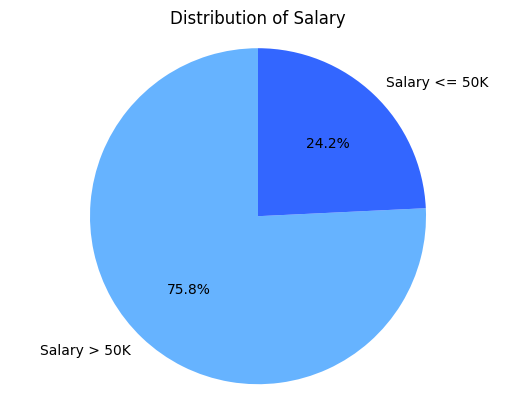

In [93]:
import matplotlib.pyplot as plt

# Data
labels = ['Salary > 50K', 'Salary <= 50K']
sizes = [0.757586, 0.242414]  # Equal sizes for illustration purposes
colors = ['#66b3ff', '#3366ff']  # Different shades of blue

# Plotting the pie chart
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax1.axis('equal')

plt.title('Distribution of Salary')
plt.show()


Observation:

Salary > 50K: The larger portion of the pie (75.8%) represents individuals with a salary greater than 50,000.

Salary <= 50K: The smaller portion of the pie (24.2%) represents individuals with a salary less than or equal to 50,000.

In [94]:
df.head()

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,race,sex,capital_gain,capital_loss,working_hours_per_week,native_contienent,salary
0,3.663562,Government,11.258240,High-School or Equivalent,4239.993890,not_married,Office or Administrative,White,Male,7.684784,0,773.634767,north_america,<=50K
1,3.912023,Self-Employed,11.330336,High-School or Equivalent,4239.993890,married,Professional,White,Male,0.000000,0,176.218157,north_america,<=50K
2,3.637586,Private,12.281393,High-School or Equivalent,2498.817484,not_married,Manual Labor,White,Male,0.000000,0,773.634767,north_america,<=50K
3,3.970292,Private,12.366153,School,1668.843921,married,Manual Labor,Black,Male,0.000000,0,773.634767,north_america,<=50K
4,3.332205,Private,12.732011,High-School or Equivalent,4239.993890,married,Professional,Black,Female,0.000000,0,773.634767,north_america,<=50K


In [95]:
df['salary'] = df['salary'].str.strip().map({'<=50K': 1, '>50K': 0})


Adjusted 'salary' column:

- '<=50K' is now represented as 1.

- '>50K' is now represented as 0.

In [96]:
df.head()

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,race,sex,capital_gain,capital_loss,working_hours_per_week,native_contienent,salary
0,3.663562,Government,11.258240,High-School or Equivalent,4239.993890,not_married,Office or Administrative,White,Male,7.684784,0,773.634767,north_america,1
1,3.912023,Self-Employed,11.330336,High-School or Equivalent,4239.993890,married,Professional,White,Male,0.000000,0,176.218157,north_america,1
2,3.637586,Private,12.281393,High-School or Equivalent,2498.817484,not_married,Manual Labor,White,Male,0.000000,0,773.634767,north_america,1
3,3.970292,Private,12.366153,School,1668.843921,married,Manual Labor,Black,Male,0.000000,0,773.634767,north_america,1
4,3.332205,Private,12.732011,High-School or Equivalent,4239.993890,married,Professional,Black,Female,0.000000,0,773.634767,north_america,1


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32531 entries, 0 to 32530
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     32531 non-null  float64
 1   workclass               32531 non-null  object 
 2   fnlwgt                  32531 non-null  float64
 3   education               32531 non-null  object 
 4   education_no_of_years   32531 non-null  float64
 5   marital_status          32531 non-null  object 
 6   occupation              32531 non-null  object 
 7   race                    32531 non-null  object 
 8   sex                     32531 non-null  object 
 9   capital_gain            32531 non-null  float64
 10  capital_loss            32531 non-null  int64  
 11  working_hours_per_week  32531 non-null  float64
 12  native_contienent       32531 non-null  object 
 13  salary                  32531 non-null  int64  
dtypes: float64(5), int64(2), object(7)
mem


Created dummy variables for object columns, dropping the first category for each column.

In [98]:
# creating dummy variables for object columns
object_columns = df.select_dtypes(include='object').columns
df = pd.get_dummies(df, columns=object_columns, drop_first=True)

In [99]:
df.head()

,age,fnlwgt,education_no_of_years,capital_gain,capital_loss,working_hours_per_week,salary,workclass_Private,workclass_Self-Employed,workclass_Unemployed,...,occupation_Technical Support,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,native_contienent_europe,native_contienent_north_america,native_contienent_other,native_contienent_south_america
0,3.663562,11.258240,4239.993890,7.684784,0,773.634767,1,0,0,0,...,0,0,0,0,1,1,0,1,0,0
1,3.912023,11.330336,4239.993890,0.000000,0,176.218157,1,0,1,0,...,0,0,0,0,1,1,0,1,0,0
2,3.637586,12.281393,2498.817484,0.000000,0,773.634767,1,1,0,0,...,0,0,0,0,1,1,0,1,0,0
3,3.970292,12.366153,1668.843921,0.000000,0,773.634767,1,1,0,0,...,0,0,1,0,0,1,0,1,0,0
4,3.332205,12.732011,4239.993890,0.000000,0,773.634767,1,1,0,0,...,0,0,1,0,0,0,0,1,0,0


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32531 entries, 0 to 32530
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   age                                  32531 non-null  float64
 1   fnlwgt                               32531 non-null  float64
 2   education_no_of_years                32531 non-null  float64
 3   capital_gain                         32531 non-null  float64
 4   capital_loss                         32531 non-null  int64  
 5   working_hours_per_week               32531 non-null  float64
 6   salary                               32531 non-null  int64  
 7   workclass_Private                    32531 non-null  uint8  
 8   workclass_Self-Employed              32531 non-null  uint8  
 9   workclass_Unemployed                 32531 non-null  uint8  
 10  education_Associate or Master        32531 non-null  uint8  
 11  education_High-School or Equ


Data types after creating dummy variables:

- Float64: 5 columns
- Int64: 2 columns
- Uint8: 22 columns
- Memory usage: 2.4 MB.

Created feature matrix X by dropping the 'salary' column and target variable y with only the 'salary' column.

In [101]:
X = df.drop(['salary'],axis=1)
y = df[['salary']]

Spliting Data

In [102]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=7)

Split the data into training and testing sets:

Features for training (X_train) and testing (X_test).
Target variable for training (y_train) and testing (y_test).
Using a test size of 0.3 and a random state of 7.

In [103]:
print(X_test.shape)
print(X_train.shape)
print(y_test.shape)
print(y_train.shape)

(9760, 28)
(22771, 28)
(9760, 1)
(22771, 1)


In [104]:
y_train.value_counts()/len(y_train)

salary
1         0.757586
0         0.242414
dtype: float64


Imported Logistic Regression model and performance evaluation metrics from scikit-learn.

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,recall_score,accuracy_score,roc_auc_score,roc_curve,f1_score,precision_score # use to check  model  performance
# lonreg=LogisticRegression()

Use confusion matrix beacuse it showing counts of true positive, True negative, false positive and false negative predictions

In [106]:
def make_confusion_matrix(y_actual, y_predict, labels=[1, 0]):
    """
    y_predict: prediction of class
    y_actual: ground truth
    """

    cm = confusion_matrix(y_actual, y_predict, labels=labels)

    df_cm = pd.DataFrame(cm, index=["Payment Defaulter", "Not Defaulter"],
                         columns=["Payment Defaulter", "Not Defaulter"])

    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]

    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)

    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=labels, fmt="", cmap="Blues")
    plt.ylabel("True label")
    plt.xlabel("Predicted labels")
    plt.show()

Using sklearn to make model

In [107]:
logreg = LogisticRegression()

In [108]:
logreg.fit(X_train,y_train)

LogisticRegression()

Predicting on the train set with default cutoff to be 0.5

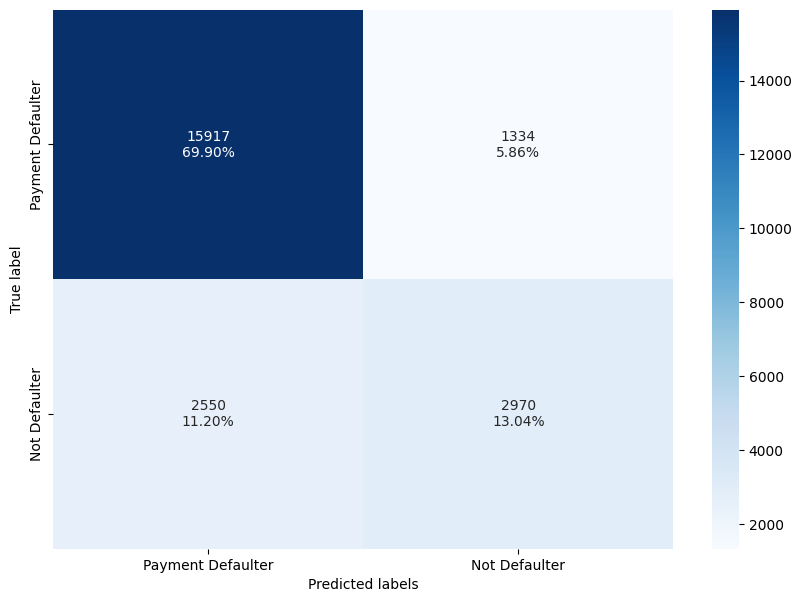

In [109]:
pred_train = logreg.predict(X_train)
# pred _test=logreg.predict(X_test)
make_confusion_matrix(y_train,pred_train)

In [110]:
recall_score(y_train,pred_train)

0.9226711494985798

In [111]:
accuracy_score(y_train,pred_train)

0.8294321725001098

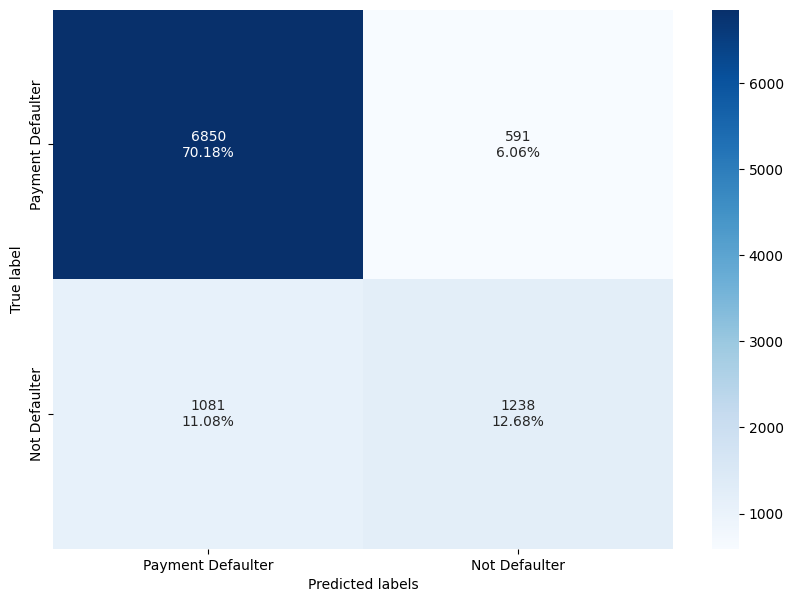

In [112]:
# it is used beacuse it is maximize the value of TP and TN and MInimize the value of FP and FN
pred_test = logreg.predict(X_test)
make_confusion_matrix(y_test,pred_test)

In [113]:
accuracy_score(y_test,pred_test)

0.828688524590164

In [114]:
recall_score(y_test,pred_test)

0.9205751915065179

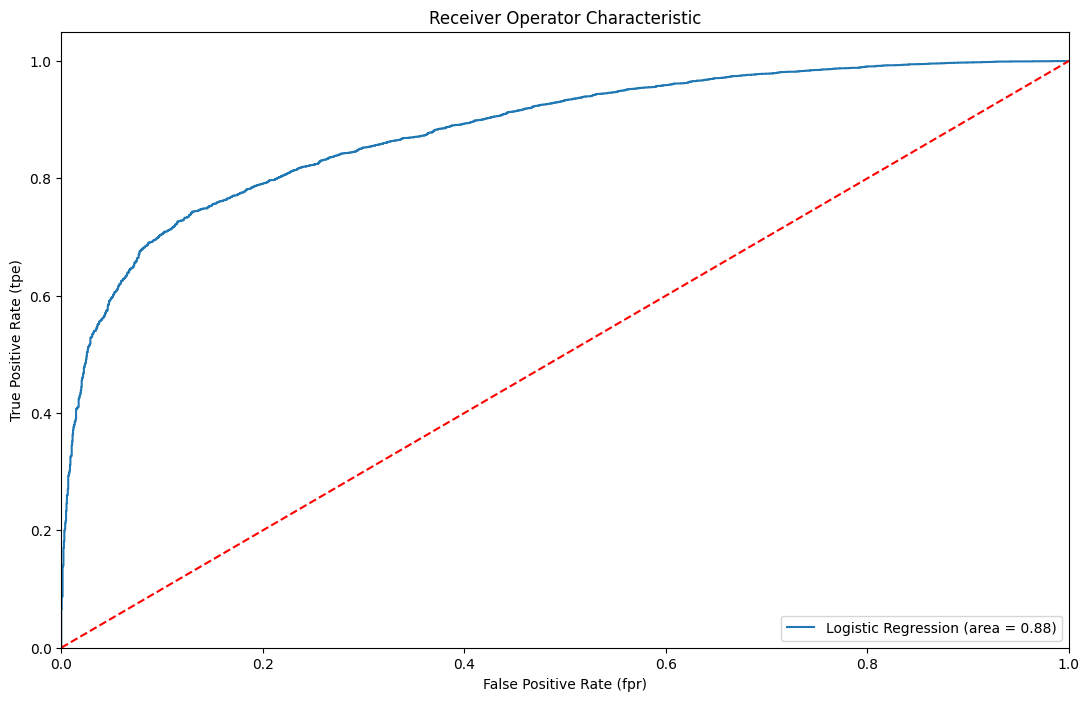

In [ ]:
logit_roc_auc = roc_auc_score(y_test,logreg.predict_proba(X_test)[:,1])
fpr,tpr,threshold = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure(figsize=(13,8))
plt.plot(fpr,tpr,label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate (fpr)')
plt.ylabel('True Positive Rate (tpe)')
plt.title('Receiver Operator Characteristic')
plt.legend(loc='lower right')
plt.savefig('Log_ROC')
plt.show()

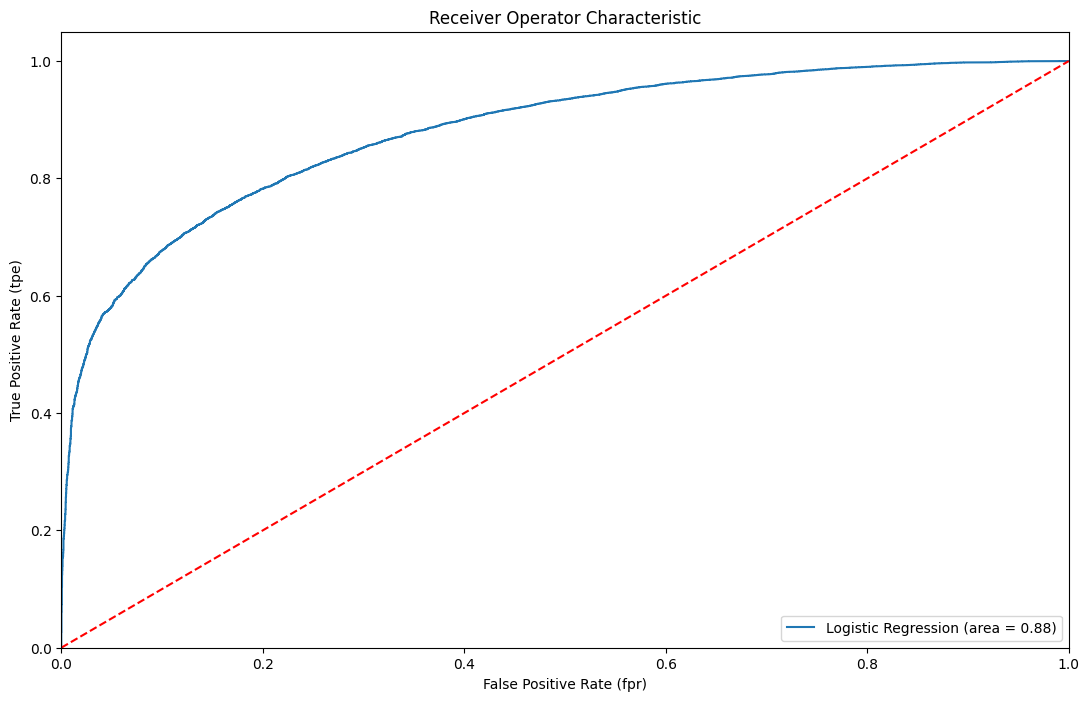

In [ ]:
logit_roc_auc = roc_auc_score(y_train,logreg.predict_proba(X_train)[:,1])
fpr,tpr,threshold = roc_curve(y_train, logreg.predict_proba(X_train)[:,1])
plt.figure(figsize=(13,8))
plt.plot(fpr,tpr,label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate (fpr)')
plt.ylabel('True Positive Rate (tpe)')
plt.title('Receiver Operator Characteristic')
plt.legend(loc='lower right')
plt.savefig('Log_ROC')
plt.show()

In [ ]:
train_pred_prob = logreg.predict_proba(X_train)[:,1]
train_pred_prob

array([0.96199999, 0.93531123, 0.9950773 , ..., 0.7790871 , 0.99091366,
       0.99470361])

In [ ]:
column_names = ['Cutoff_Prob','TP','FN','TN','FP','P','N'] # probability

cutoff_data = pd.DataFrame(columns=column_names)
Cutoff_Prob = np.arange(0,1.01,0.01)

for cutoff in Cutoff_Prob:
    y_train['pred_y'] = (train_pred_prob > cutoff).astype('int64')
    TP = np.logical_and((y_train.pred_y == 1), (y_train['salary']== 1)).sum() # Conditions
    FN = np.logical_and((y_train.pred_y == 0), (y_train['salary']== 1)).sum()
    TN = np.logical_and((y_train.pred_y == 0), (y_train['salary']== 0)).sum()
    FP = np.logical_and((y_train.pred_y == 1), (y_train['salary']== 0)).sum()

    P = TP + FN
    N = TN + FP

    temp_data = {'Cutoff_Prob': cutoff,
                "TP": TP,
                "FN": FN,
                "TN": TN,
                "FP": FP,
                "P": P,
                "N": N}

    cutoff_data  = cutoff_data.append(temp_data,ignore_index=True)

# Dropping the pred_y colommns from y_train data
y_train.drop('pred_y',axis=1,inplace=True)

In [ ]:
cutoff_data['Sn'] = cutoff_data['TP']/cutoff_data['P']
cutoff_data['Sp'] = cutoff_data['TN']/cutoff_data['N']
cutoff_data['Dist'] = ((1-cutoff_data['Sn'])**2 + (1-cutoff_data['Sp'])**2)**0.5
cutoff_data['KS'] = ((cutoff_data['TP']/cutoff_data['P']) - (cutoff_data['FP']/cutoff_data['N'])).abs()
cutoff_data['Re'] =  cutoff_data['TP']/cutoff_data['P']
cutoff_data['Pr'] = cutoff_data['TP']/(cutoff_data['TP'] + cutoff_data['FP'])
cutoff_data['tpr'] = cutoff_data['Re']
cutoff_data['fpr'] = 1 - cutoff_data['Sp']
cutoff_data['f1'] = 2 * (cutoff_data['Pr'] * cutoff_data['Re'])/(cutoff_data['Pr'] + cutoff_data['Re'])

In [ ]:
cutoff_data.head()

,Cutoff_Prob,TP,FN,TN,FP,P,N,Sn,Sp,Dist,KS,Re,Pr,tpr,fpr,f1
0,0.00,17251.0,0.0,0.0,5520.0,17251.0,5520.0,1.000000,0.000000,1.000000,0.000000,1.000000,0.757586,1.000000,1.000000,0.862076
1,0.01,17251.0,0.0,3.0,5517.0,17251.0,5520.0,1.000000,0.000543,0.999457,0.000543,1.000000,0.757686,1.000000,0.999457,0.862140
2,0.02,17250.0,1.0,40.0,5480.0,17251.0,5520.0,0.999942,0.007246,0.992754,0.007188,0.999942,0.758909,0.999942,0.992754,0.862910
3,0.03,17248.0,3.0,109.0,5411.0,17251.0,5520.0,0.999826,0.019746,0.980254,0.019572,0.999826,0.761199,0.999826,0.980254,0.864345
4,0.04,17246.0,5.0,184.0,5336.0,17251.0,5520.0,0.999710,0.033333,0.966667,0.033043,0.999710,0.763706,0.999710,0.966667,0.865915


In [ ]:
dist_cutoff = cutoff_data.loc[np.argmin(cutoff_data['Dist']),'Cutoff_Prob']
ks_cutoff = cutoff_data.loc[np.argmax(cutoff_data['KS']),'Cutoff_Prob']
f1_cutoff = cutoff_data.loc[np.argmax(cutoff_data['f1']),'Cutoff_Prob']

In [ ]:
print('The dist cutoff determined is: ',dist_cutoff)
print('The KS cutoff determined is: ',ks_cutoff)
print('The f1 cutoff determined is: ',f1_cutoff)

The dist cutoff determined is:  0.76
The KS cutoff determined is:  0.78
The f1 cutoff determined is:  0.39


In [ ]:
cutoffs = [dist_cutoff,ks_cutoff,f1_cutoff]

for cutoff in cutoffs:
    y_pred_train = (logreg.predict_proba(X_train)[:,1] > cutoff).astype(int)
    y_pred_test = (logreg.predict_proba(X_test)[:,1] > cutoff).astype(int)

    print('Using the cutoff value as : ', cutoff)
    print('Accuracy on train data: ',accuracy_score(y_train,y_pred_train))
    print('Accuracy on test data : ',accuracy_score(y_test,y_pred_test))
    print('Recall on train data: ', recall_score(y_train,y_pred_train))
    print('Recall on test data: ', recall_score(y_test,y_pred_test))
    print('Pression on train data: ',precision_score(y_train,y_pred_train))
    print('Precision on test data: ',precision_score(y_test,y_pred_test))
    print('f1 score on train data: ',f1_score(y_train,y_pred_train))
    print('f1 score on train data: ',f1_score(y_test,y_pred_test))
    print('\n')

Using the cutoff value as :  0.76
Accuracy on train data:  0.7817838478766853
Accuracy on test data :  0.7827868852459017
Recall on train data:  0.7715494753927309
Recall on test data:  0.7673699771536084
Pression on train data:  0.9283024131678058
Precision on test data:  0.9362190523036563
f1 score on train data:  0.8426984076735573
f1 score on train data:  0.843426883308715


Using the cutoff value as :  0.78
Accuracy on train data:  0.7701901541434281
Accuracy on test data :  0.7747950819672131
Recall on train data:  0.7486522520433598
Recall on test data:  0.7485553017067599
Pression on train data:  0.9350564726324935
Precision on test data:  0.9445480752925216
f1 score on train data:  0.8315359108907704
f1 score on train data:  0.8352076773129405


Using the cutoff value as :  0.39
Accuracy on train data:  0.8273242281849721
Accuracy on test data :  0.8285860655737705
Recall on train data:  0.9539736826850618
Recall on test data:  0.9543072167719393
Pression on train data:  0.839

In [ ]:
def make_confusion_matrix(model, y_actual, labels=[1, 0]):
    """
    Creates a confusion matrix to visualize the performance of a classification model.

    Args:
        model: The trained classifier model.
        y_actual: The ground truth labels.
        labels: The list of labels to use in the confusion matrix (optional).

    Returns:
        A pandas DataFrame representing the confusion matrix.
    """

    y_predict = model.predict(X_test)
    cm = metrics.confusion_matrix(y_actual, y_predict, labels=[0, 1])

    df_cm = pd.DataFrame(cm, index=["Actual - No", "Actual - Yes"], columns=["Predicted No", "Predicted Yes"])

    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels, fmt='')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')

In [ ]:
# Function to cal recall score
def get_recall_score(model):
  '''
  model: classifier to predict values of X

  '''

  pred_train = model.predict(X_train)  # Predict on training set
  pred_test = model.predict(X_test)  # Predict on test set

  print("Recall on training set: ", metrics.recall_score(y_train, pred_train))
  print("Recall on test set: ", metrics.recall_score(y_test, pred_test))

### Desicion Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score

In [ ]:
model = DecisionTreeClassifier(criterion='gini',class_weight={0:0.24,1:0.75},random_state=1)

In [ ]:
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight={0: 0.24, 1: 0.75}, random_state=1)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

def make_confusion_matrix(model, y_actual):
    """
    Creates a confusion matrix to visualize the performance of a classification model.

    Args:
        model: The trained classifier model.
        y_actual: The ground truth labels for the test set.

    Returns:
        None (displays the confusion matrix plot)
    """
    y_predict = model.predict(X_test)
    cm = metrics.confusion_matrix(y_actual, y_predict)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

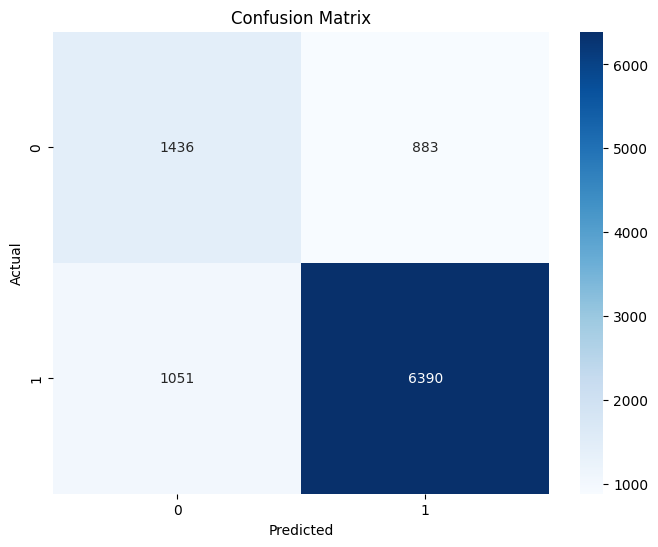

In [ ]:
make_confusion_matrix(model,y_test)

In [ ]:
get_recall_score(model)

Recall on training set:  1.0
Recall on test set:  0.8587555436097298


In [ ]:
feature_names = X.columns  # Get the list of column names as feature names
#feature_names.remove('Discount_Offering')  # Remove the target column name if present

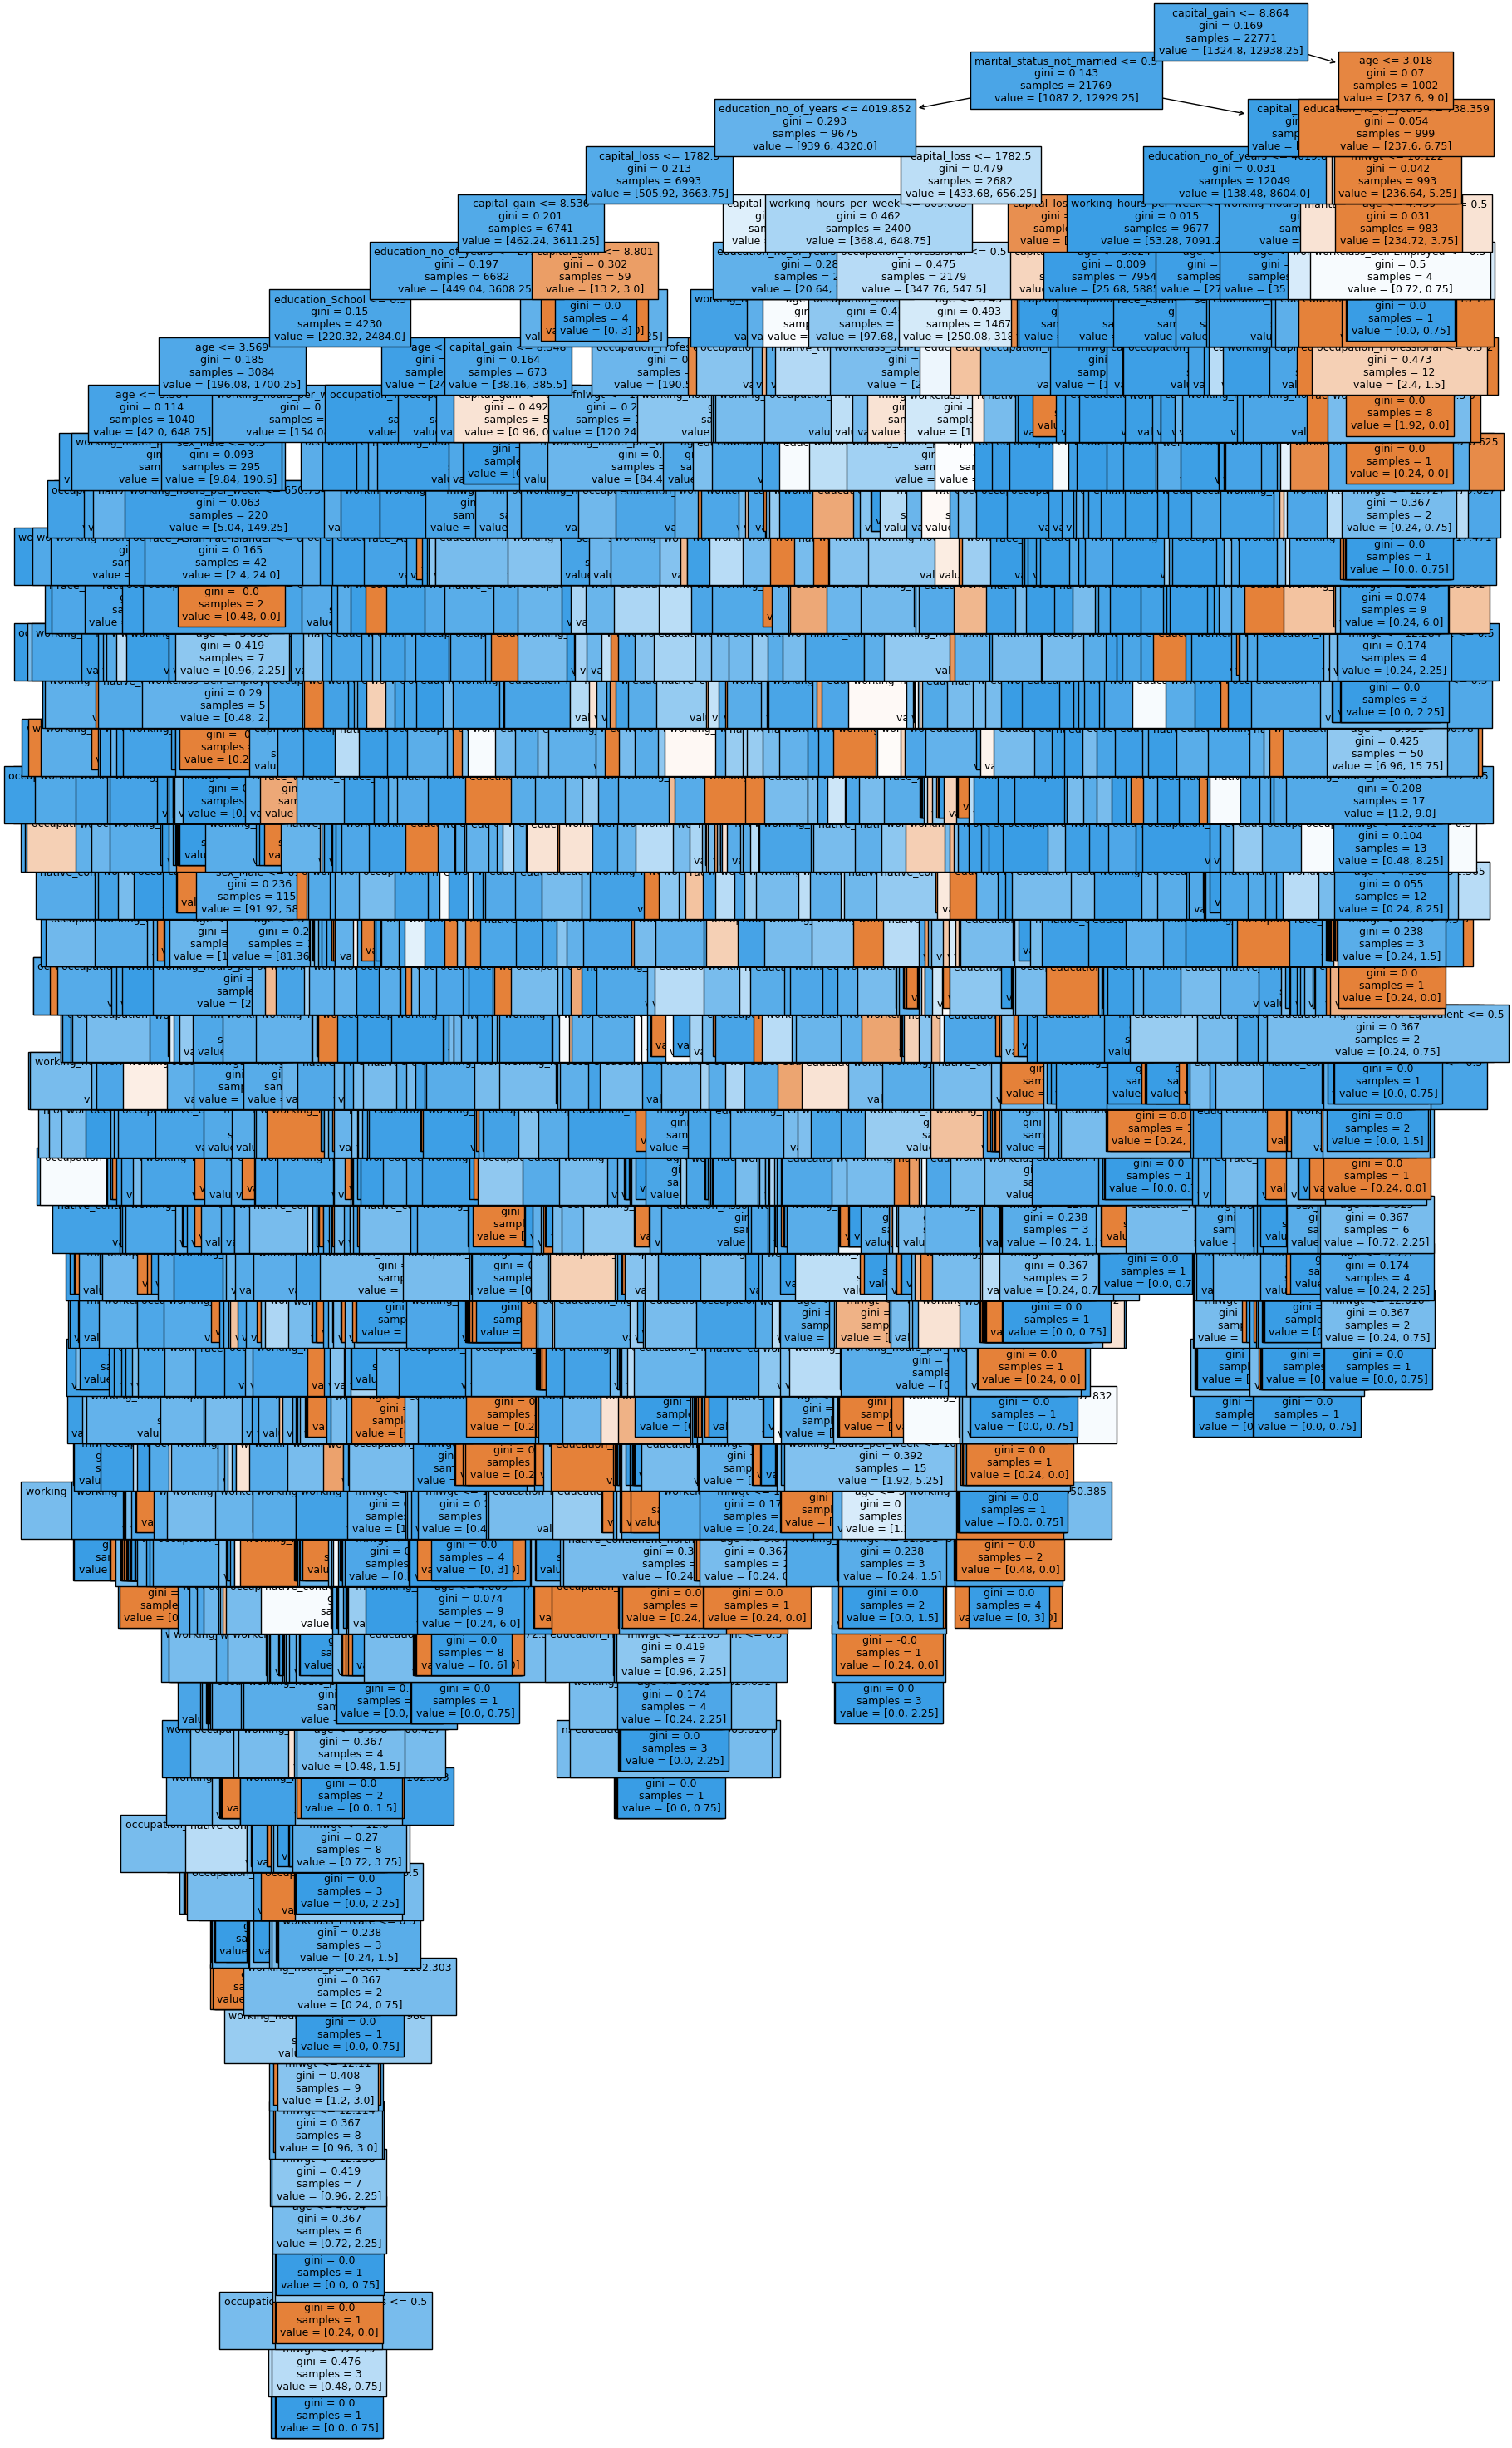

In [ ]:
plt.figure(figsize=(20,38))
out = tree.plot_tree(model,feature_names=feature_names, filled=True, fontsize=9, node_ids=False, class_names=None,)

# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_linewidth(1)
        arrow.set_edgecolor('black')

plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
estimator = DecisionTreeClassifier(random_state=1, class_weight={0:0.24, 1:0.75})

# Grid of parameters to choose from
parameters = {
    'max_depth': np.arange(1, 10),
    'criterion': ['entropy', 'gini'],
    'splitter': ['best', 'random'],
    'min_impurity_decrease': [0.000001, 0.00001, 0.0001],
    'max_features': ['log2', 'sqrt']
     }

# type of scoring used to compare parameter combination
scorer = metrics.make_scorer(metrics.recall_score)


# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.                                 I
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.24, 1: 0.75}, criterion='entropy',
                       max_depth=1, max_features='log2',
                       min_impurity_decrease=1e-06, random_state=1)

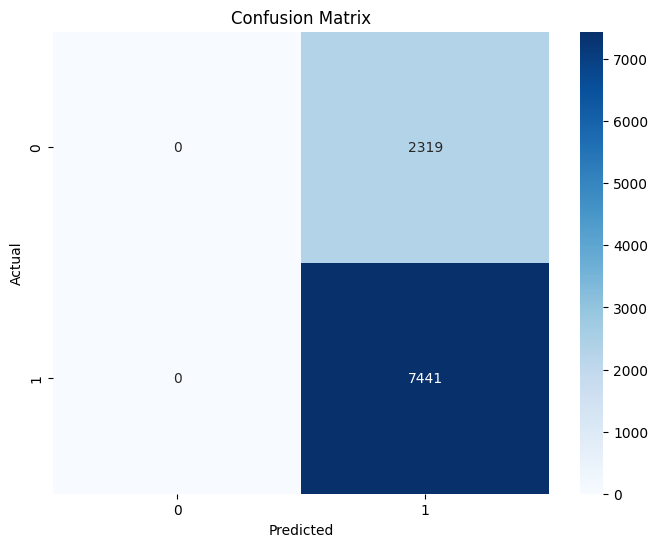

In [ ]:
make_confusion_matrix(estimator,y_test)

In [ ]:
get_recall_score(estimator)

Recall on training set:  1.0
Recall on test set:  1.0


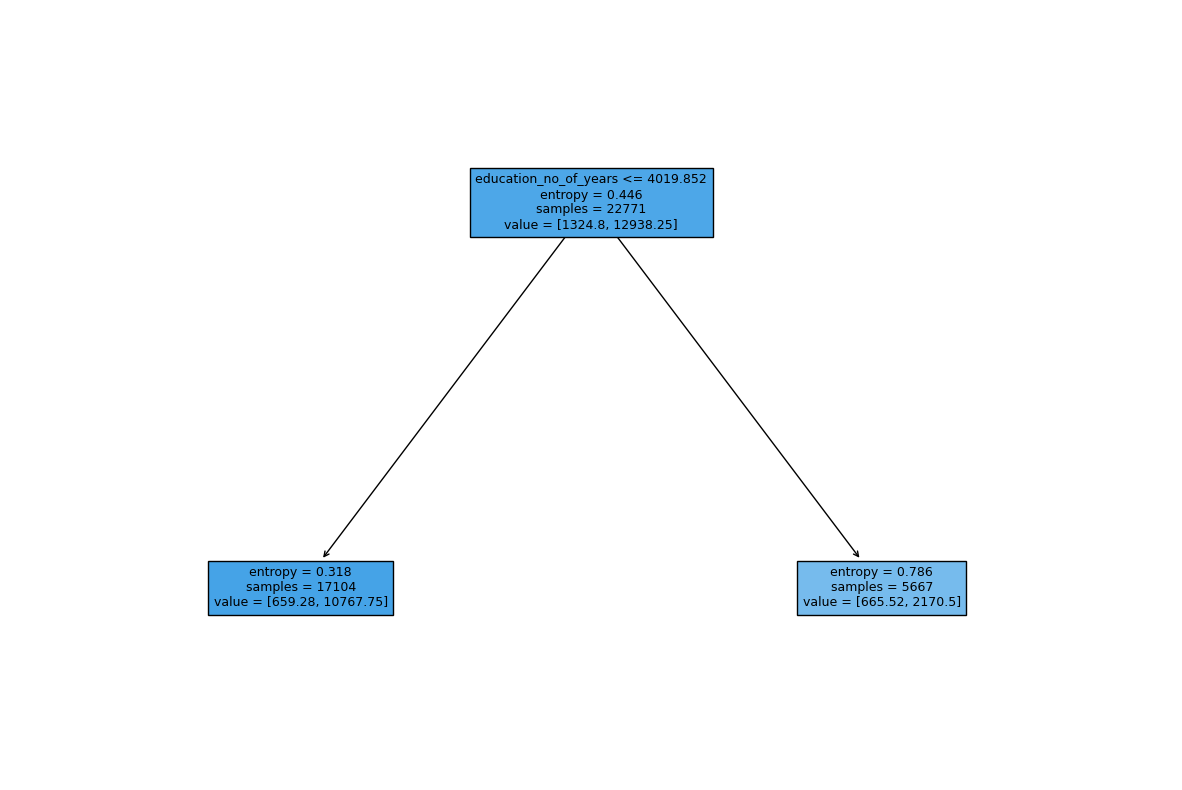

In [ ]:
plt.figure(figsize=(15,10))
out = tree.plot_tree(estimator,feature_names=feature_names, filled=True, fontsize=9, node_ids=False, class_names=None,)

# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_linewidth(1)
        arrow.set_edgecolor('black')

plt.show()

#post prunning

In [ ]:
clf = DecisionTreeClassifier(random_state=1, class_weight={0: 0.24, 1: 0.75})
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000e+00,0.000127
1,2.241766e-20,0.000127
2,2.241766e-20,0.000127
3,2.802208e-20,0.000127
4,2.802208e-20,0.000127
...,...,...
1309,1.905113e-03,0.117789
1310,2.723553e-03,0.120513
1311,9.267354e-03,0.129780
1312,1.206091e-02,0.141841


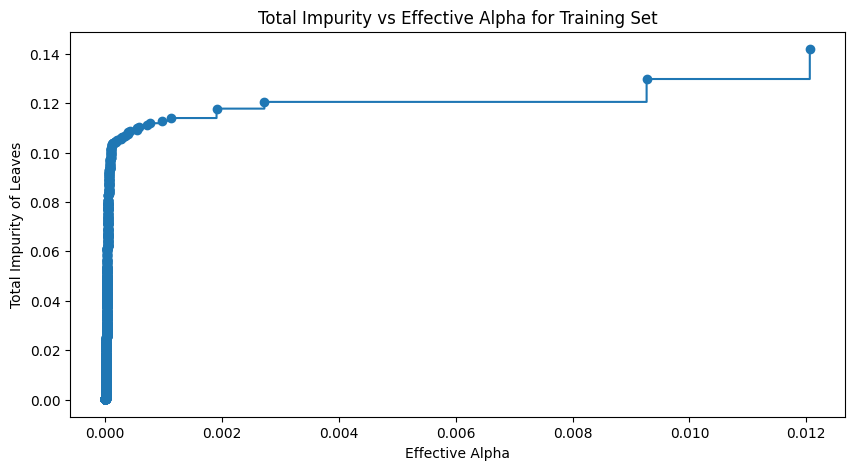

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))  # Corrected the 'figsize' argument

# Plotting the total impurity vs effective alpha
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")

# Labeling the axes and setting the title
ax.set_xlabel("Effective Alpha")
ax.set_ylabel("Total Impurity of Leaves")
ax.set_title("Total Impurity vs Effective Alpha for Training Set")

plt.show()


Observation:

The plot shows how the total impurity of leaves decreases as the effective alpha increases, indicating the trade-off between tree complexity and impurity. The point where the curve starts to flatten represents a suitable alpha value, balancing tree simplicity and predictive power.

effective alpha

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha, class_weight={0: 0.24, 1: 0.75})  # Corrected 'radom_state' to 'random_state'
    clf.fit(X_train, y_train)
    clfs.append(clf)  # Fixed the typo 'appennd' to 'append'

print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(clfs[-1].tree_.node_count, ccp_alphas[-1]))  # Changed 'tree_node_count' to 'tree_.node_count'

Number of nodes in the last tree is: 1 with ccp_alpha: 0.02667120297588732


Observation:

The code creates a series of decision tree classifiers with different values of ccp_alpha (complexity parameter) and prints the number of nodes in the last tree along with its corresponding ccp_alpha value. This helps in selecting an appropriate alpha for pruning the decision tree.

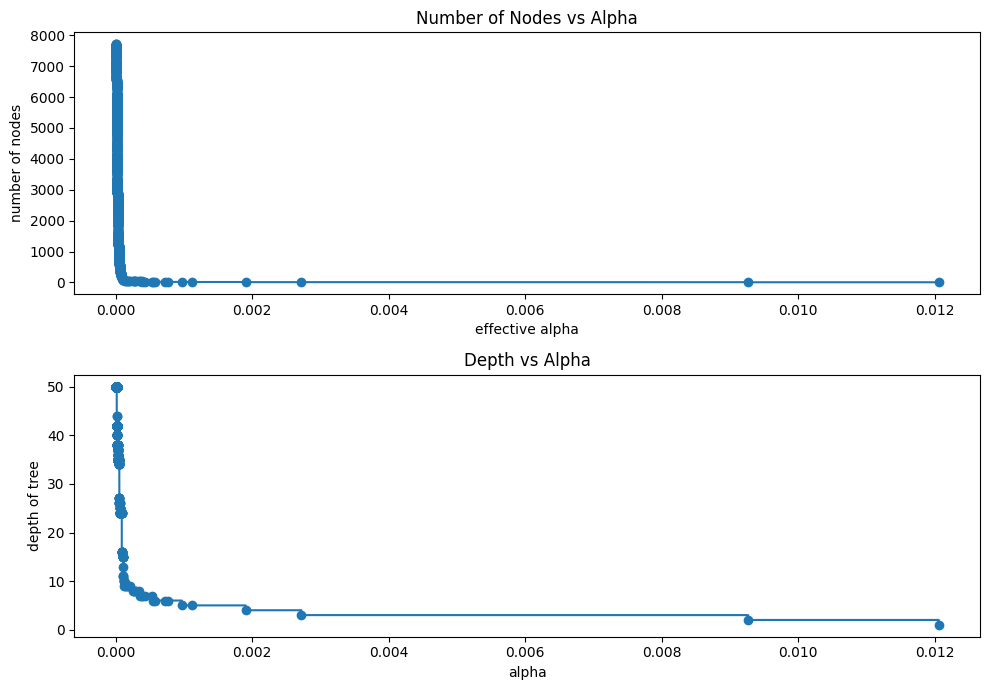

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]

fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("effective alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of Nodes vs Alpha")

ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs Alpha")

fig.tight_layout()
plt.show()

Observation:

The top plot illustrates how the number of nodes decreases as the effective alpha increases, indicating the pruning effect. A higher alpha leads to simpler trees with fewer nodes.

In the bottom plot, the depth of the tree is shown concerning alpha. As alpha increases, the depth of the tree decreases, emphasizing the trade-off between tree complexity and alpha. Higher alpha values result in shallower trees.

In [ ]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    value_train = metrics.recall_score(y_train, pred_train)
    recall_train.append(value_train)

In [ ]:
recall_test=[]
for clf in clfs:
    pred_test3=clf.predict(X_test)
    values_test=metrics.recall_score(y_test,pred_test3)
    recall_test.append(values_test)

In [ ]:
train_score = [clf.score(X_train,y_train)for clf in clfs]
test_score = [clf.score(X_test,y_test) for clf in clfs]

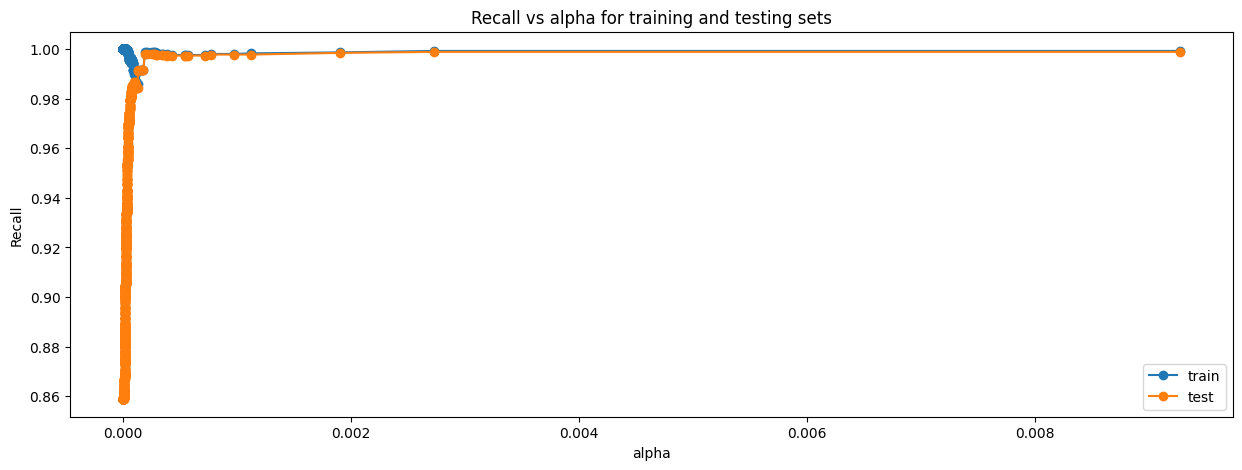

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas[:-1], recall_train[:-1], marker='o', label="train", drawstyle="default")
ax.plot(ccp_alphas[:-1], recall_test[:-1], marker='o', label="test", drawstyle="default")
ax.legend()
plt.show()


Observation:

The plot displays the relationship between the complexity parameter (alpha) and recall scores for both the training and testing sets. As alpha increases, the recall scores tend to stabilize, indicating a balance between model complexity and predictive performance. It helps identify an optimal alpha that achieves good recall without overfitting to the training data.

In [ ]:
# Creating the model whrere we get highest train and test recall
index_best_model=np.argmax(recall_test)
best_model=clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0027235533599517248,
                       class_weight={0: 0.24, 1: 0.75}, random_state=1)


In [ ]:
best_model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0027235533599517248,
                       class_weight={0: 0.24, 1: 0.75}, random_state=1)

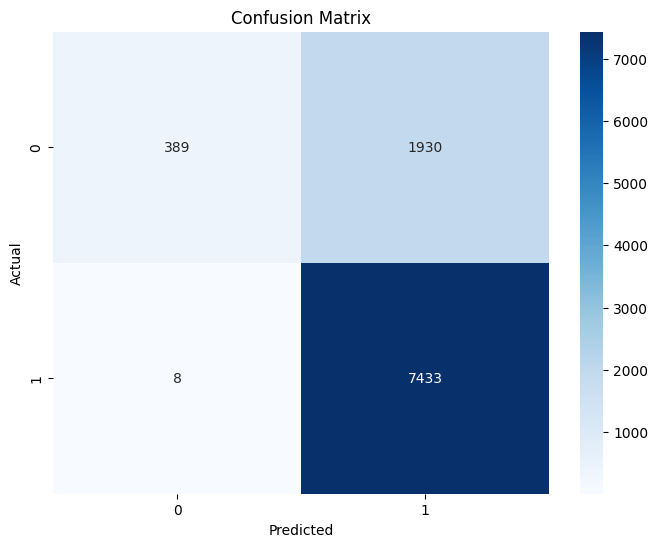

In [ ]:
make_confusion_matrix(best_model,y_test)

In [ ]:
get_recall_score(best_model)

Recall on training set:  0.9993043881514115
Recall on test set:  0.9989248756887515


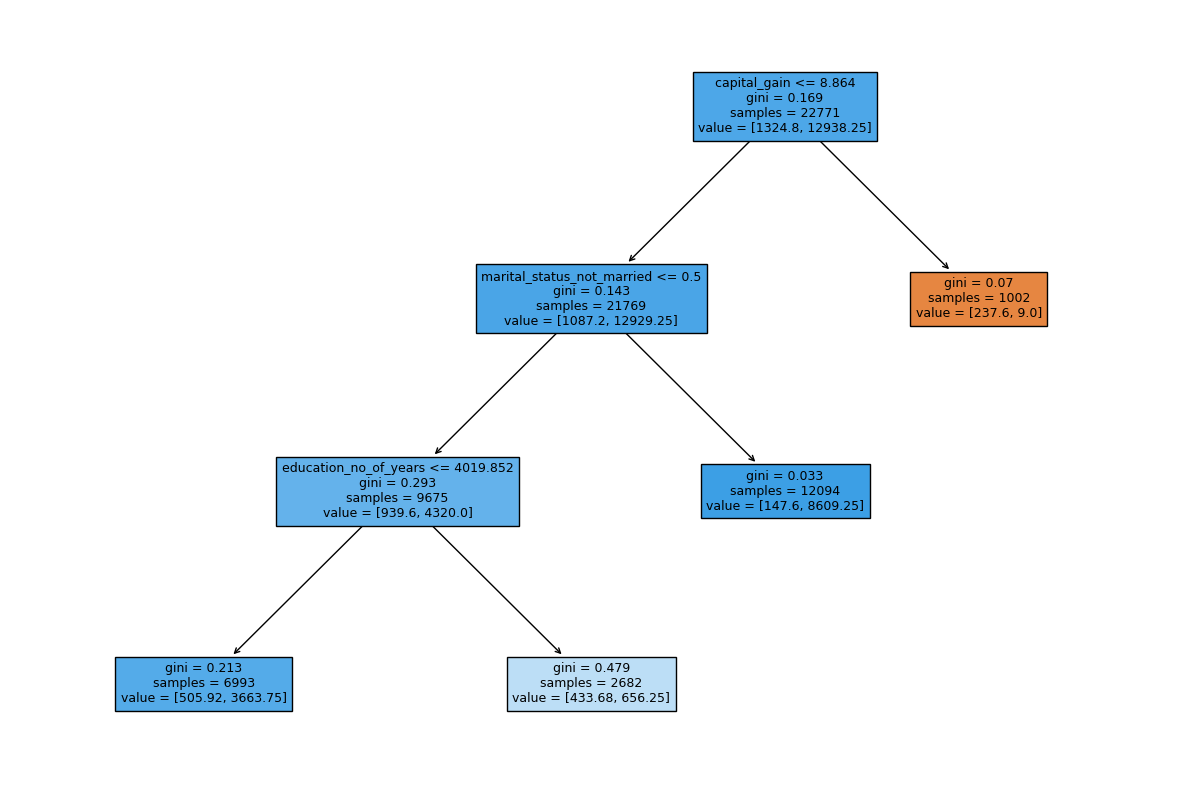

In [ ]:
plt.figure(figsize=(15,10))
out = tree.plot_tree(best_model,feature_names=feature_names, filled=True, fontsize=9, node_ids=False, class_names=None,)

# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)

plt.show()

In [ ]:
best_model2=DecisionTreeClassifier(ccp_alpha=0.0026,class_weight={0:0.24,1:0.75},random_state=1)
best_model2.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0026, class_weight={0: 0.24, 1: 0.75},
                       random_state=1)

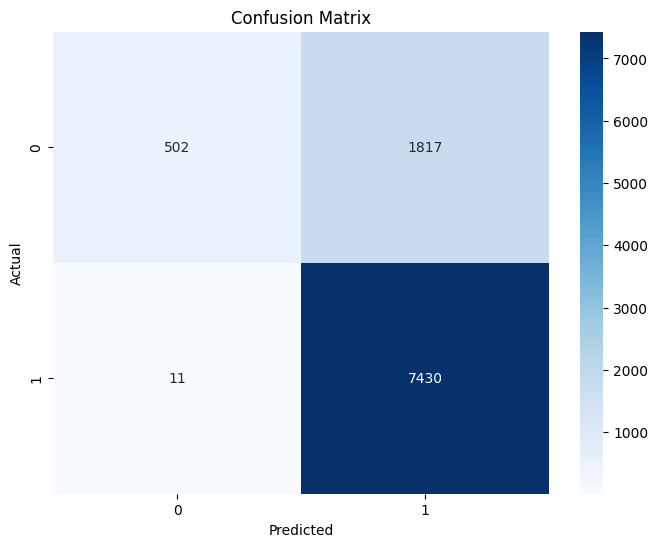

In [ ]:
make_confusion_matrix(best_model2,y_test)

In [ ]:
get_recall_score(best_model2)

Recall on training set:  0.9987247116109211
Recall on test set:  0.9985217040720333


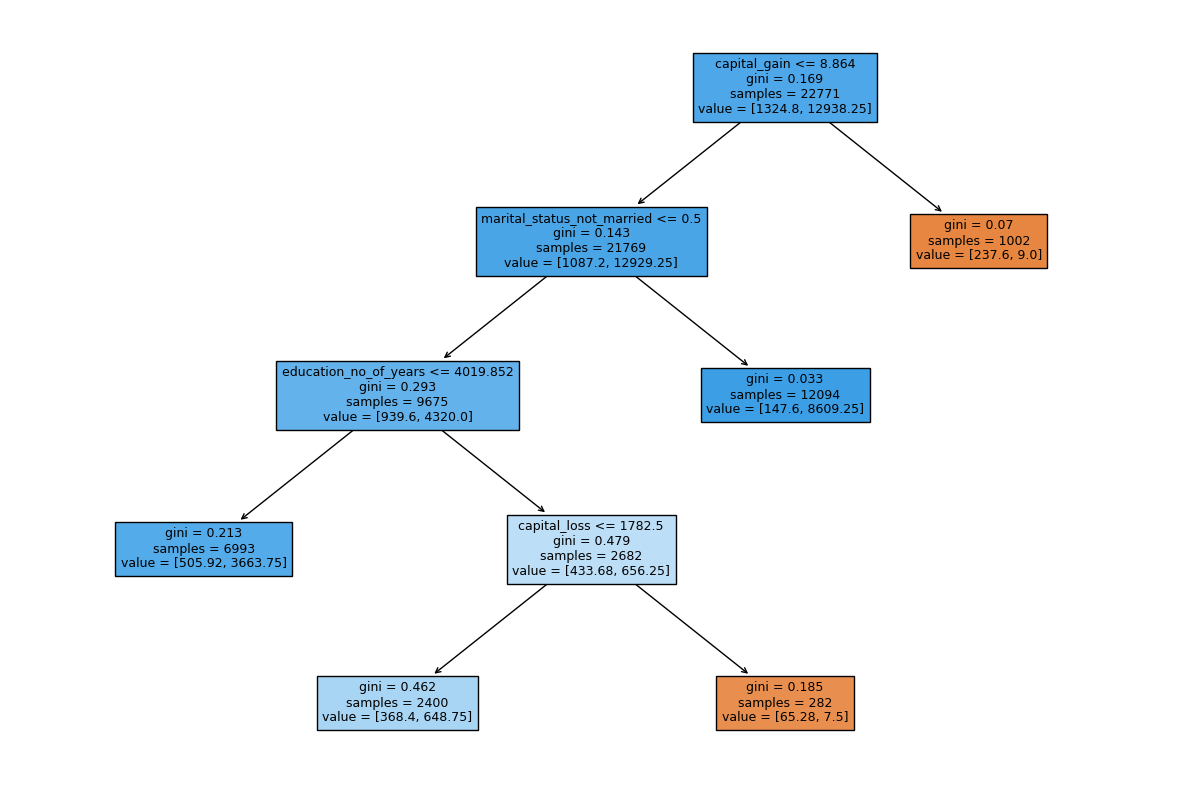

In [ ]:
plt.figure(figsize=(15,10))
out = tree.plot_tree(best_model2,feature_names=feature_names, filled=True, fontsize=9, node_ids=False, class_names=None,)

# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)

plt.show()

In [ ]:
importances = pd.DataFrame(best_model2.feature_importances_, columns=["Imp"], index=X_train.columns)
importances = importances.sort_values(by='Imp', ascending=False)
print(importances)

                                          Imp
capital_gain                         0.525820
marital_status_not_married           0.237780
education_no_of_years                0.182705
capital_loss                         0.053695
age                                  0.000000
occupation_Protective Services       0.000000
native_contienent_other              0.000000
native_contienent_north_america      0.000000
native_contienent_europe             0.000000
sex_Male                             0.000000
race_White                           0.000000
race_Other                           0.000000
race_Black                           0.000000
race_Asian-Pac-Islander              0.000000
occupation_Technical Support         0.000000
occupation_Sales                     0.000000
occupation_Private House Services    0.000000
occupation_Professional              0.000000
fnlwgt                               0.000000
occupation_Office or Administrative  0.000000
education_School                  

In [ ]:
comparision_frame=pd.DataFrame({'Model':['Base decision tree model','Intial decision tree model','Decision tree with hyperparameter turning','Decision tree with post pruning'],
                                'train_Recall':[1.0,1.0,0.99,0.99],'Test_recall':[0.85,1.0,0.99,0.99]})

In [ ]:
comparision_frame

,Model,train_Recall,Test_recall
0,Base decision tree model,1.00,0.85
1,Intial decision tree model,1.00,1.00
2,Decision tree with hyperparameter turning,0.99,0.99
3,Decision tree with post pruning,0.99,0.99


In [ ]:
import pandas as pd

# Your DataFrame
data = {
    'Model': ['Base decision tree model', 'Initial decision tree model', 'Decision tree with hyperparameter tuning', 'Decision tree with post pruning'],
    'train_Recall': [1.00, 1.00, 0.99, 0.99],
    'Test_recall': [0.85, 1.00, 0.99, 0.99]
}

# Create DataFrame
df = pd.DataFrame(data)

# Convert columns to percentages
df['train_Recall'] = (df['train_Recall'] * 100).astype(str) + '%'
df['Test_recall'] = (df['Test_recall'] * 100).astype(str) + '%'

# Display DataFrame
print(df)


                                      Model train_Recall Test_recall
0                  Base decision tree model       100.0%       85.0%
1               Initial decision tree model       100.0%      100.0%
2  Decision tree with hyperparameter tuning        99.0%       99.0%
3           Decision tree with post pruning        99.0%       99.0%


In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train,y_train)

BaggingClassifier(random_state=1)

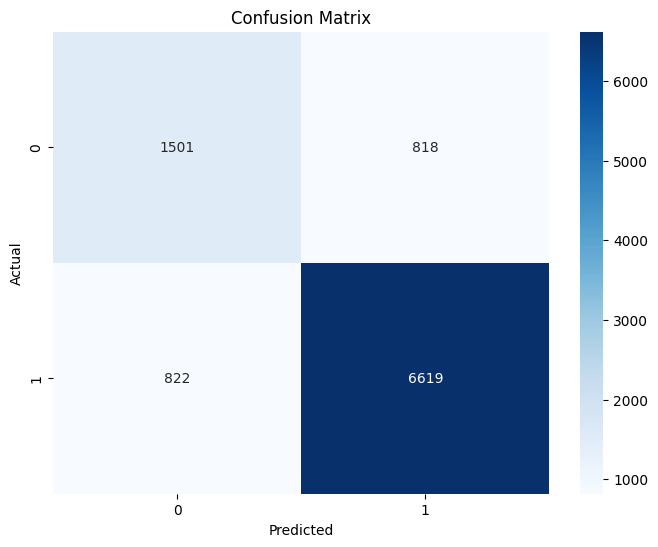

In [ ]:
make_confusion_matrix(bagging,y_test)

In [ ]:
get_recall_score(bagging)

Recall on training set:  0.9925801402817228
Recall on test set:  0.8895309770192178


In [ ]:
bagging_wt = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='gini',class_weight={0:0.24,1:0.75},random_state=1),random_state=1)
bagging_wt.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.24,
                                                                      1: 0.75},
                                                        random_state=1),
                  random_state=1)

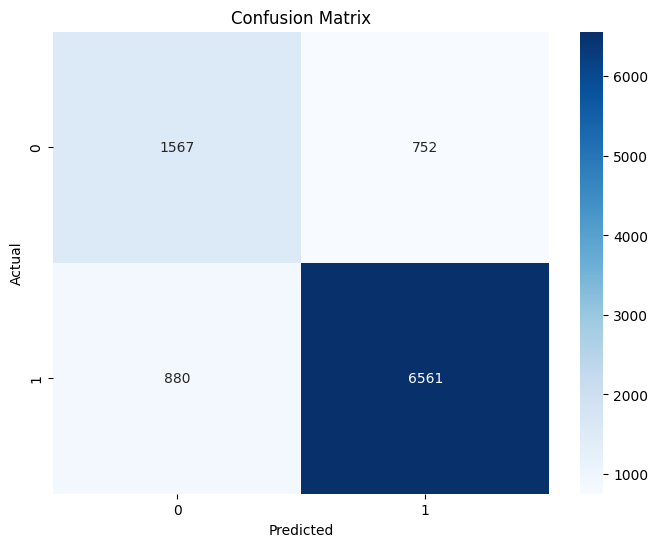

In [ ]:
make_confusion_matrix(bagging_wt,y_test)

In [ ]:
get_recall_score(bagging_wt)

Recall on training set:  0.9920004637412324
Recall on test set:  0.8817363257626664


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

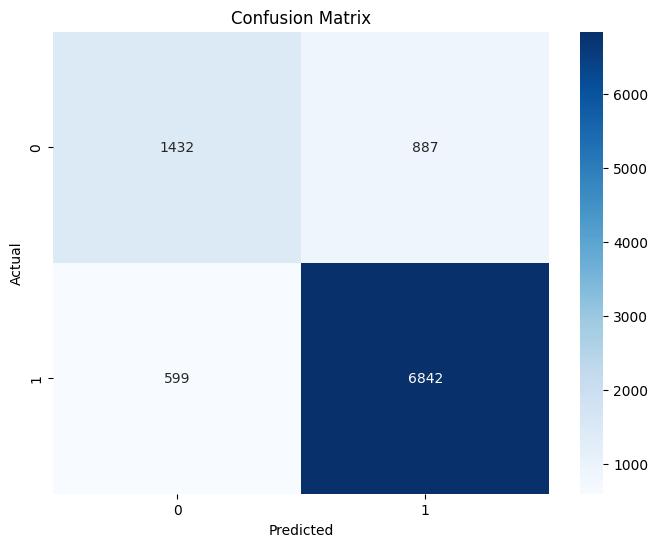

In [ ]:
make_confusion_matrix(rf, y_test)

In [ ]:
get_recall_score(rf)

Recall on training set:  0.9998260970378529
Recall on test set:  0.9195000671952694


Random Forest with class_weight

In [ ]:
rf_wt = RandomForestClassifier(class_weight={0:0.24,1:0.75},random_state=1)
rf_wt.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.24, 1: 0.75}, random_state=1)

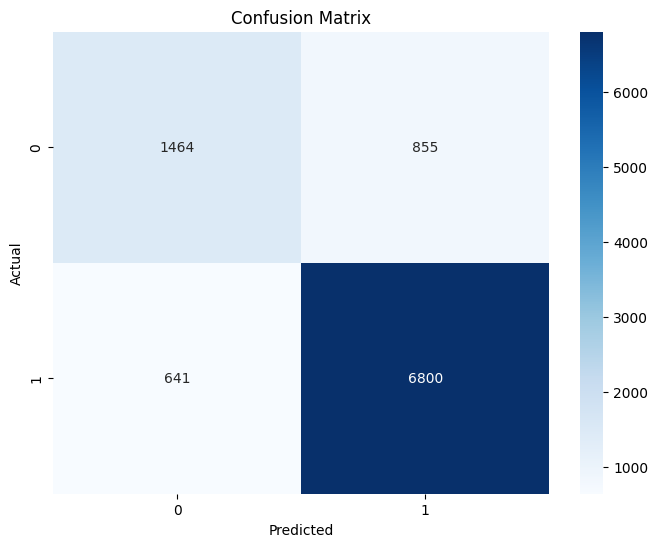

In [ ]:
make_confusion_matrix(rf_wt, y_test)

In [ ]:
get_recall_score(rf_wt)

Recall on training set:  1.0
Recall on test set:  0.9138556645612149


Tunning Bagging Classifier

In [ ]:
cl1 = DecisionTreeClassifier(class_weight={0: 0.24, 1: 0.75}, random_state=1)
param_grid = {'base_estimator': [cl1],
              'n_estimators': [5, 7, 15, 51, 101],
              'max_features': [0.7, 0.8, 0.9, 1]
              }

grid = GridSearchCV(BaggingClassifier(random_state=1, bootstrap=True), param_grid=param_grid, scoring='recall', cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=BaggingClassifier(random_state=1),
             param_grid={'base_estimator': [DecisionTreeClassifier(class_weight={0: 0.24,
                                                                                 1: 0.75},
                                                                   random_state=1)],
                         'max_features': [0.7, 0.8, 0.9, 1],
                         'n_estimators': [5, 7, 15, 51, 101]},
             scoring='recall')

In [ ]:
## getting the best estimator
bagging_estimator = grid.best_estimator_
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.24,
                                                                      1: 0.75},
                                                        random_state=1),
                  max_features=1, n_estimators=5, random_state=1)

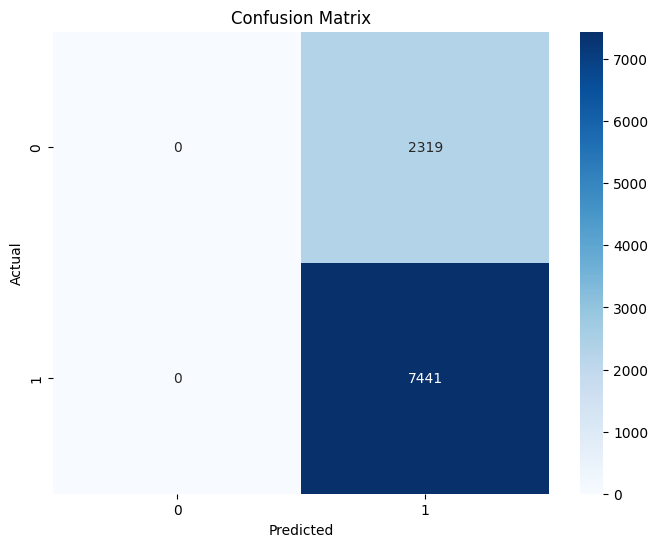

In [ ]:
make_confusion_matrix(bagging_estimator,y_test)

In [ ]:
get_recall_score(bagging_estimator)

Recall on training set:  1.0
Recall on test set:  1.0


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Choose the type of classifier.
rf_estimator = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    'n_estimators': [110, 251, 501],
    'min_samples_leaf': np.arange(1, 6, 1),
    'max_features': [0.7, 0.9, 'log2', 'sqrt'],
    'max_samples': [0.7, 0.9, None]  # 100% of the rows
}

# Run the randomized search
random_search = RandomizedSearchCV(rf_estimator, parameters, scoring='recall', cv=5, n_iter=10, random_state=1)
random_search = random_search.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator = random_search.best_estimator_

# Fit the best algorithm to the data.
rf_estimator.fit(X_train, y_train)


RandomForestClassifier(max_features='log2', max_samples=0.7, min_samples_leaf=4,
                       n_estimators=110, random_state=1)

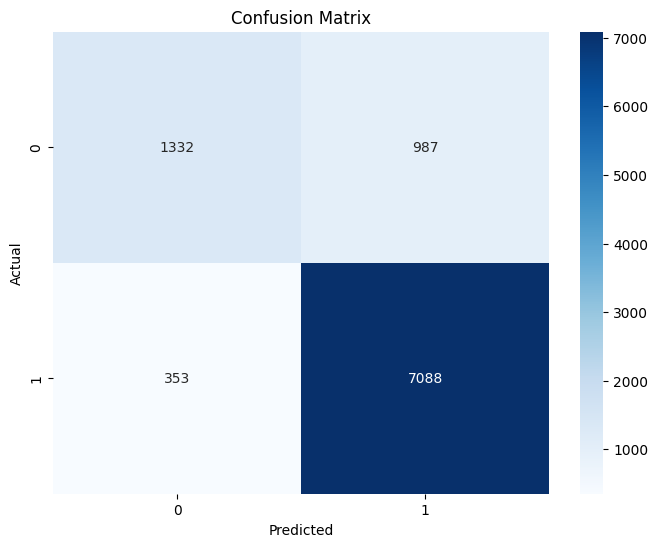

In [ ]:
make_confusion_matrix(rf_estimator,y_test)

In [ ]:
get_recall_score(rf_estimator)

Recall on training set:  0.9645817633760362
Recall on test set:  0.9525601397661605


### AdaBoost (Adaptive Boosting)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import recall_score

# Assuming 'ada_model' is your AdaBoost model
ada_model = AdaBoostClassifier(random_state=1)

# Fit the AdaBoost model on training data
ada_model.fit(X_train, y_train)

AdaBoostClassifier(random_state=1)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import recall_score

# Assuming 'ada_model' is your AdaBoost model
ada_model = AdaBoostClassifier(random_state=1)

# Fit the AdaBoost model on training data
ada_model.fit(X_train, y_train)

# Calculate recall for training data with AdaBoost
recall_train = recall_score(y_train, ada_model.predict(X_train))

# Calculate recall for testing data with AdaBoost
recall_test = recall_score(y_test, ada_model.predict(X_test))

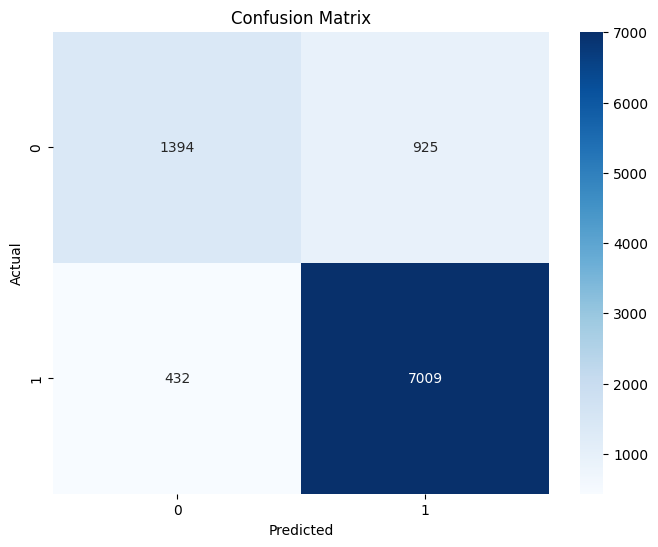

In [ ]:
make_confusion_matrix(ada_model,y_test)

In [ ]:
# Print the results
print("Recall on Training Data:", recall_train)
print("Recall on Testing Data:", recall_test)

Recall on Training Data: 0.9416845400266651
Recall on Testing Data: 0.9419432871925817


### AdaBoostClassifier with hypertunining

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Create AdaBoost classifier
ada_model = AdaBoostClassifier(random_state=1)

# Define hyperparameter distribution
param_dist = {
    'n_estimators': np.arange(50, 201, 50),
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
}

# Use RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(ada_model, param_distributions=param_dist, n_iter=10, scoring='recall', cv=3, random_state=1)
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params_random = random_search.best_params_

# Fit AdaBoost with the best hyperparameters on training data
best_ada_model_random = AdaBoostClassifier(**best_params_random, random_state=1)
best_ada_model_random.fit(X_train, y_train)

# Calculate recall for training data with tuned AdaBoost
recall_train_tuned_random = recall_score(y_train, best_ada_model_random.predict(X_train))

# Calculate recall for testing data with tuned AdaBoost
recall_test_tuned_random = recall_score(y_test, best_ada_model_random.predict(X_test))

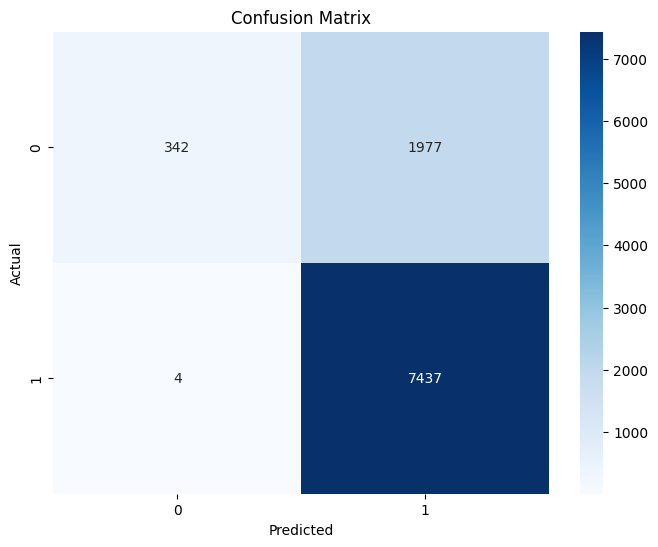

In [ ]:
make_confusion_matrix(best_ada_model_random,y_test)

In [ ]:

print("Recall on Training Data (Tuned AdaBoost - Randomized Search):", recall_train_tuned_random)
print("Recall on Testing Data (Tuned AdaBoost - Randomized Search):", recall_test_tuned_random)

Recall on Training Data (Tuned AdaBoost - Randomized Search): 0.9994203234595096
Recall on Testing Data (Tuned AdaBoost - Randomized Search): 0.9994624378443757


### Gradient Boosting

In [115]:
from sklearn.ensemble import GradientBoostingClassifier

# Assuming 'gb_model' is your Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=1)

# Fit the Gradient Boosting model on training data
gb_model.fit(X_train, y_train)

# Calculate recall for training data with Gradient Boosting
recall_train_gb = recall_score(y_train, gb_model.predict(X_train))

# Calculate recall for testing data with Gradient Boosting
recall_test_gb = recall_score(y_test, gb_model.predict(X_test))

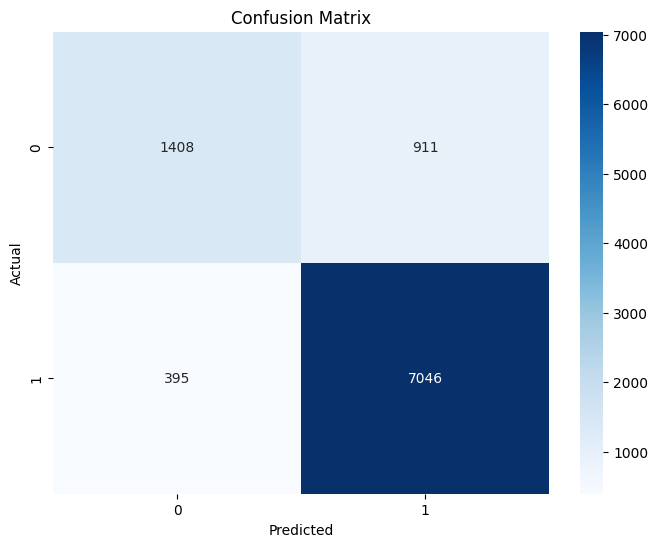

In [ ]:
make_confusion_matrix(gb_model,y_test)

In [116]:
# Print the results
print("Recall on Training Data (Gradient Boosting):", recall_train_gb)
print("Recall on Testing Data (Gradient Boosting):", recall_test_gb)

Recall on Training Data (Gradient Boosting): 0.9503217204799722
Recall on Testing Data (Gradient Boosting): 0.9469157371321059


### Gradient Boosting with hypertuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Create Gradient Boosting classifier
gb_model = GradientBoostingClassifier(random_state=1)

# Define hyperparameter distribution
param_dist_gb = {
    'n_estimators': np.arange(50, 201, 50),
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
    'max_depth': [3, 5, 7, 9],
}

# Use RandomizedSearchCV for hyperparameter tuning
random_search_gb = RandomizedSearchCV(gb_model, param_distributions=param_dist_gb, n_iter=10, scoring='recall', cv=3, random_state=1)
random_search_gb.fit(X_train, y_train)

# Get the best hyperparameters
best_params_random_gb = random_search_gb.best_params_

# Fit Gradient Boosting with the best hyperparameters on training data
best_gb_model_random = GradientBoostingClassifier(**best_params_random_gb, random_state=1)
best_gb_model_random.fit(X_train, y_train)

# Calculate recall for training data with tuned Gradient Boosting
recall_train_tuned_random_gb = recall_score(y_train, best_gb_model_random.predict(X_train))

# Calculate recall for testing data with tuned Gradient Boosting
recall_test_tuned_random_gb = recall_score(y_test, best_gb_model_random.predict(X_test))

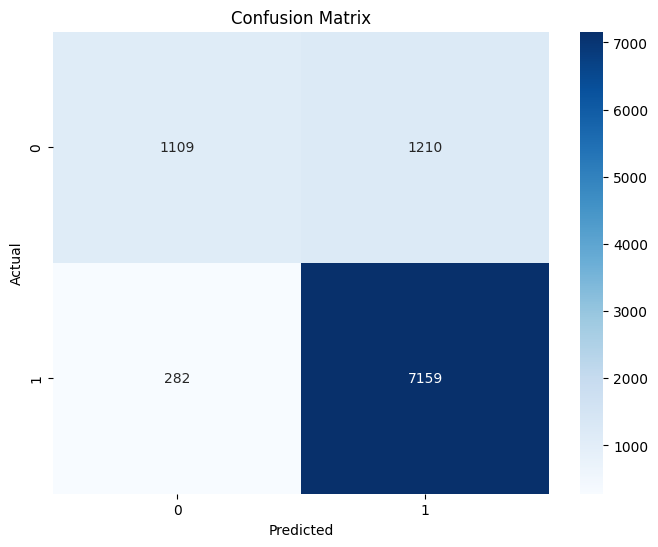

In [ ]:
make_confusion_matrix(best_gb_model_random,y_test)

In [ ]:
# Print the results
print("Recall on Training Data (Tuned Gradient Boosting - Randomized Search):", recall_train_tuned_random_gb)
print("Recall on Testing Data (Tuned Gradient Boosting - Randomized Search):", recall_test_tuned_random_gb)

Recall on Training Data (Tuned Gradient Boosting - Randomized Search): 0.9630166367167121
Recall on Testing Data (Tuned Gradient Boosting - Randomized Search): 0.9621018680284908


### xg Boosting

In [ ]:
from xgboost import XGBClassifier

# Assuming 'xgb_model' is your XGBoost model
xgb_model = XGBClassifier(random_state=1)

# Fit the XGBoost model on training data
xgb_model.fit(X_train, y_train)

# Calculate recall for training data with XGBoost
recall_train_xgb = recall_score(y_train, xgb_model.predict(X_train))

# Calculate recall for testing data with XGBoost
recall_test_xgb = recall_score(y_test, xgb_model.predict(X_test))

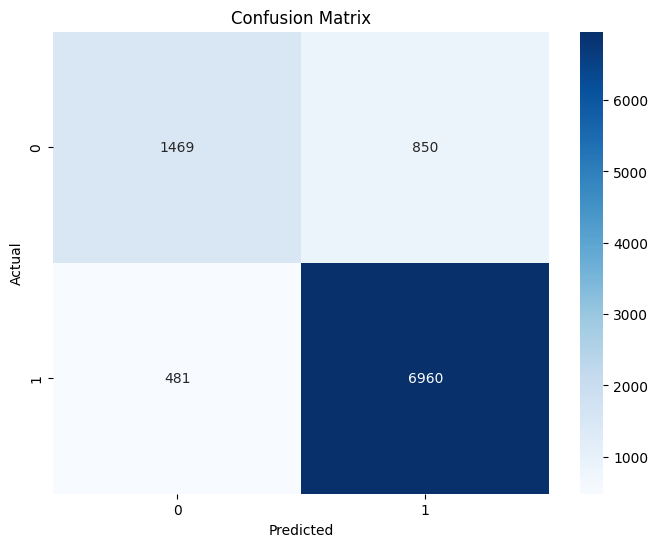

In [ ]:
make_confusion_matrix(xgb_model,y_test)

In [ ]:
# Print the results
print("Recall on Training Data (XGBoost):", recall_train_xgb)
print("Recall on Testing Data (XGBoost):", recall_test_xgb)

Recall on Training Data (XGBoost): 0.9619732189438294
Recall on Testing Data (XGBoost): 0.9353581507861847


 ### XGBClassifier with hypertuning

In [ ]:
# Create XGBoost classifier
xgb_model = XGBClassifier(random_state=1)

# Define hyperparameter distribution
param_dist_xgb = {
    'n_estimators': np.arange(50, 201, 50),
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
    'max_depth': [3, 5, 7, 9],
}

# Use RandomizedSearchCV for hyperparameter tuning
random_search_xgb = RandomizedSearchCV(xgb_model, param_distributions=param_dist_xgb, n_iter=10, scoring='recall', cv=3, random_state=1)
random_search_xgb.fit(X_train, y_train)

# Get the best hyperparameters
best_params_random_xgb = random_search_xgb.best_params_

# Fit XGBoost with the best hyperparameters on training data
best_xgb_model_random = XGBClassifier(**best_params_random_xgb, random_state=1)
best_xgb_model_random.fit(X_train, y_train)

# Calculate recall for training data with tuned XGBoost
recall_train_tuned_random_xgb = recall_score(y_train, best_xgb_model_random.predict(X_train))

# Calculate recall for testing data with tuned XGBoost
recall_test_tuned_random_xgb = recall_score(y_test, best_xgb_model_random.predict(X_test))

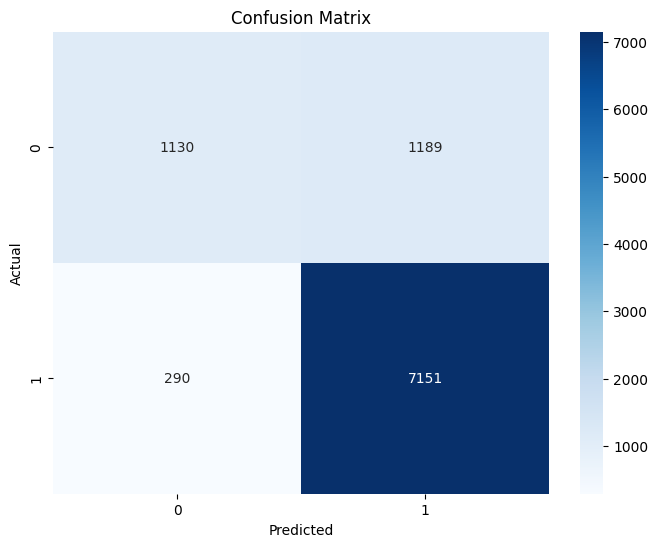

In [ ]:
make_confusion_matrix(best_xgb_model_random,y_test)

In [ ]:
# Print the results
print("Recall on Training Data (Tuned XGBoost - Randomized Search):", recall_train_tuned_random_xgb)
print("Recall on Testing Data (Tuned XGBoost - Randomized Search):", recall_test_tuned_random_xgb)

Recall on Training Data (Tuned XGBoost - Randomized Search): 0.9606399629007014
Recall on Testing Data (Tuned XGBoost - Randomized Search): 0.9610267437172423


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import recall_score

# Assuming 'gb_model' is your Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=1)

# Fit the Gradient Boosting model on the entire dataset
gb_model.fit(X, y)

# Calculate recall for the entire dataset with Gradient Boosting
recall_gb = recall_score(y, gb_model.predict(X))

# Print the result
print("Recall on the Entire Dataset (Gradient Boosting):", recall_gb)

Recall on the Entire Dataset (Gradient Boosting): 0.9503887898914628


In [117]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier

# Assuming you have already trained a Gradient Boosting model called 'grad_boost_model'
# If not, replace it with the actual variable name of your trained model

# Fit the model on your training data
gb_model.fit(X_train, y_train)

# Get feature importances
feature_importances = gb_model.feature_importances_

# Create a DataFrame to store feature names and their importances
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)



                                Feature  Importance
12           marital_status_not_married    0.382058
3                          capital_gain    0.212249
2                 education_no_of_years    0.188135
4                          capital_loss    0.065248
0                                   age    0.061520
5                working_hours_per_week    0.038034
15              occupation_Professional    0.026094
11                     education_School    0.009170
1                                fnlwgt    0.005506
23                             sex_Male    0.003747
18         occupation_Technical Support    0.002349
17                     occupation_Sales    0.002317
7               workclass_Self-Employed    0.001237
16       occupation_Protective Services    0.000766
22                           race_White    0.000704
6                     workclass_Private    0.000491
26              native_contienent_other    0.000158
25      native_contienent_north_america    0.000127
20          

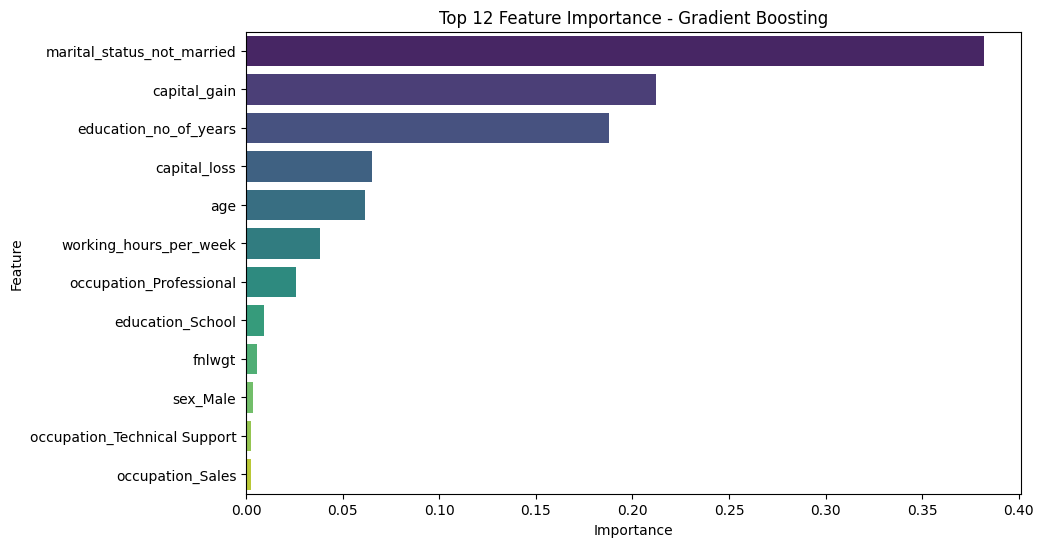

In [118]:
# Assuming 'importance_df' contains the DataFrame with feature importances
top_features = importance_df.nlargest(12, 'Importance')  # Selecting the top 12 features

# Plotting feature importances for the top 12 features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')
plt.title('Top 12 Feature Importance - Gradient Boosting')
plt.show()


In [ ]:
# Data
data = {
    'Model': ['AdaBoost', 'Tuned AdaBoost', 'Gradient Boosting', 'Tuned Gradient Boosting', 'XGBoost', 'Tuned XGBoost'],
    'Recall (Training)': [recall_train, recall_train_tuned_random, recall_train_gb, recall_train_tuned_random_gb, recall_train_xgb, recall_train_tuned_random_xgb],
    'Recall (Testing)': [recall_test, recall_test_tuned_random, recall_test_gb, recall_test_tuned_random_gb, recall_test_xgb, recall_test_tuned_random_xgb]
}

# Create DataFrame
df = pd.DataFrame(data)

# Display DataFrame
print(df)

                     Model  Recall (Training)  Recall (Testing)
0                 AdaBoost           0.941685          0.941943
1           Tuned AdaBoost           0.999420          0.999462
2        Gradient Boosting           0.950322          0.946916
3  Tuned Gradient Boosting           0.963017          0.962102
4                  XGBoost           0.961973          0.935358
5            Tuned XGBoost           0.960640          0.961027



### Observations:

### AdaBoost:

Training Recall: 94.17%
Testing Recall: 94.19%
Tuned AdaBoost:

Training Recall: 99.94%
Testing Recall: 99.95%

### Gradient Boosting:

Training Recall: 95.03%
Testing Recall: 94.69%

### Tuned Gradient Boosting:

Training Recall: 96.30%
Testing Recall: 96.21%

### XGBoost:

Training Recall: 96.20%
Testing Recall: 93.54%

### Tuned XGBoost:

Training Recall: 96.06%
Testing Recall: 96.10%

Overall, all models perform well, with Tuned AdaBoost and Tuned Gradient Boosting achieving exceptionally high recall scores on both training and testing sets.


### Business Conclusion:

The model can guide HR departments in the hiring process by highlighting the factors that contribute to higher salary levels. This information can be used to refine job descriptions, set competitive salary offers, and identify potential candidates.